# Project 1: Housing Data Price Prediction

- Course: DATA*6100 (Introduction to Data Science)
- Instructor: Dr. Mihai Nica
- Submitted by: Harshal Kakaiya (1353288)

## Introduction

**In this project, we have 2 files which will be involving the Ames Housing Dataset (which consists of information about 1000 house sales)**
- The file `Housing_Data_Train.csv` has all the **training data**, including the price `SalePrice` of the houses, which is the variable I will be trying to predict.
- The file `Housing_Data_Test.csv` has some **testing data** which includes all the other columns except the `SalePrice`, on which I will be predicting the `SalePrice`.

### Project Workflow Overview

**This project will proceed in several steps outlined below for clarity and organization:**

1. Exploratory Data Analysis (EDA)
2. Data Preprocessing
3. Feature Engineering
4. Data Transformation
5. Fitting the model
6. Model Evaluation
7. Hyperparameters Tuning
8. Predictions on Test Dataset
9. Demonstration of Underfitting vs Overfitting

### Import the Libraries

- In this step, I will import essential libraries crucial for the project, covering various tasks such as data cleaning, manipulation, visualization, and model fitting. These libraries provide the necessary functions and tools to efficiently handle and analyze the dataset throughout the project.

In [314]:
# Importing Data Manipulation Libraries
import numpy as np
import pandas as pd

# Importing Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Sklearn Libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
# Setting Config for the ColumnTransformer (scikit-learn)
from sklearn import set_config

# eXtreme Gradient Boosted Trees (XGBoost)
from xgboost import XGBRegressor

# To display all columns in a dataframe
pd.set_option("display.max_columns", None)

## Step-1: Exploratory Data Analysis (EDA)

In this section, major EDA steps will be taken one by one which also includes the data wrangling, analysis, and cleaning altogether.

### Read the datasets
- Here, the downloaded dataset is imported and read into a DataFrame using the `pandas` package.

In [315]:
# Reading the CSV Files
train_df = pd.read_csv("data/Housing_Data_Train.csv")
test_df = pd.read_csv("data/Housing_Data_Test.csv")

- The training DataFrame is then examined using the `head()` method from `pandas`, as shown in the code below:

In [316]:
# Printing the head of the datafrane
train_df.head(5)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,149,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,120.0,TA,TA,PConc,Gd,TA,No,GLQ,680,Unf,0,400,1080,GasA,Ex,Y,SBrkr,1080,0,0,1080,1,0,1,0,3,1,Gd,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,141000
1,1,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,4,1950,1950,Gable,CompShg,MetalSd,MetalSd,BrkCmn,161.0,TA,TA,CBlock,TA,TA,No,LwQ,185,Unf,0,524,709,GasA,TA,Y,SBrkr,979,224,0,1203,1,0,1,0,3,1,Gd,5,Typ,1,TA,Detchd,1950.0,Unf,1,352,TA,TA,Y,0,0,248,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000
2,2,1336,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,5,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,360.0,TA,TA,CBlock,Gd,TA,No,ALQ,686,Unf,0,664,1350,GasA,TA,Y,SBrkr,1334,0,0,1334,0,1,2,0,2,1,TA,6,Typ,1,TA,Attchd,1977.0,RFn,2,630,TA,TA,Y,0,16,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,167900
3,3,805,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,LwQ,812,Unf,0,124,936,GasA,TA,Y,SBrkr,1128,0,0,1128,0,0,1,0,2,1,TA,5,Min1,0,NaN,Attchd,1954.0,Unf,1,286,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2006,WD,Family,118000
4,4,1396,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,245.0,Gd,TA,PConc,Gd,Gd,Gd,Unf,0,Unf,0,1094,1094,GasA,Ex,Y,SBrkr,1133,1349,0,2482,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,Fin,3,642,TA,TA,Y,144,39,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213


- Next, we will check the number of rows and columns to determine the size of the DataFrame and gain insight into the dataset.

In [317]:
# Checking the shape of dataframe
train_df.shape

(1000, 82)

**This indicates that the dataset contains 1,000 records (rows) and 82 columns (features).**

### Viewing the summary

In [318]:
# Viewing the information on columns of the dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1000 non-null   int64  
 1   Id             1000 non-null   int64  
 2   MSSubClass     1000 non-null   int64  
 3   MSZoning       1000 non-null   object 
 4   LotFrontage    814 non-null    float64
 5   LotArea        1000 non-null   int64  
 6   Street         1000 non-null   object 
 7   Alley          66 non-null     object 
 8   LotShape       1000 non-null   object 
 9   LandContour    1000 non-null   object 
 10  Utilities      1000 non-null   object 
 11  LotConfig      1000 non-null   object 
 12  LandSlope      1000 non-null   object 
 13  Neighborhood   1000 non-null   object 
 14  Condition1     1000 non-null   object 
 15  Condition2     1000 non-null   object 
 16  BldgType       1000 non-null   object 
 17  HouseStyle     1000 non-null   object 
 18  OverallQu

### Checking the Statistics
- We will utilize the `describe` method from `pandas` to analyze the statistics of the numeric columns in the dataset, which will assist in handling the NA value columns.

In [319]:
# Checking the statistics
train_df.describe()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1000.000000,1000.000000,1000.000000,814.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,994.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,939.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,499.500000,725.853000,58.165000,70.120393,10778.454000,6.088000,5.578000,1970.550000,1984.620000,100.989940,440.793000,46.877000,566.091000,1053.761000,1157.822000,344.359000,5.394000,1507.57500,0.427000,0.054000,1.555000,0.37000,2.866000,1.050000,6.488000,0.630000,1978.026624,1.75500,469.382000,93.351000,46.471000,23.112000,2.898000,14.37500,2.735000,42.00000,6.307000,2007.832000,178403.271000
std,288.819436,422.179162,43.579318,25.730561,11647.964726,1.365328,1.108668,30.609908,20.682296,169.554306,459.445085,163.906355,436.109714,436.063012,376.454917,428.940075,46.661033,506.01163,0.518594,0.230515,0.541542,0.49734,0.797923,0.231416,1.576814,0.656911,25.029031,0.76391,216.271444,125.172089,64.132598,62.992535,26.742827,55.44746,38.827985,521.97074,2.729139,1.332498,71476.841901
min,0.000000,1.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,605.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,1.000000,2006.000000,52500.000000
25%,249.750000,353.750000,20.000000,59.000000,7559.500000,5.000000,5.000000,1953.000000,1966.750000,0.000000,0.000000,0.000000,222.250000,800.000000,891.000000,0.000000,0.000000,1136.25000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.00000,312.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,5.000000,2007.000000,128987.500000
50%,499.500000,732.500000,50.000000,70.000000,9544.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,382.000000,0.000000,478.000000,990.500000,1085.500000,0.000000,0.000000,1456.00000,0.000000,0.000000,2.000000,0.00000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.00000,480.000000,0.000000,24.000000,0.000000,0.000000,0.00000,0.000000,0.00000,6.000000,2008.000000,162000.000000
75%,749.250000,1089.500000,70.000000,80.000000,11475.750000,7.000000,6.000000,2000.000000,2004.000000,167.500000,704.250000,0.000000,813.250000,1301.000000,1377.250000,728.000000,0.000000,1769.50000,1.000000,0.000000,2.000000,1.00000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.00000,576.000000,168.000000,70.000000,0.000000,0.000000,0.00000,0.000000,0.00000,8.000000,2009.000000,214000.000000
max,999.000000,1455.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1115.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,1540.000000,572.000000,5642.00000,2.000000,2.000000,3.000000,2.00000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.00000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.00000,648.000000,15500.00000,12.000000,2010.000000,485000.000000


### Checking the Distribution of the Target Value
- In this subsection, we will visualize the distribution of SalePrice to determine whether a logarithmic transformation is necessary.

Text(0.5, 1.0, 'Distribution of Sale Price')

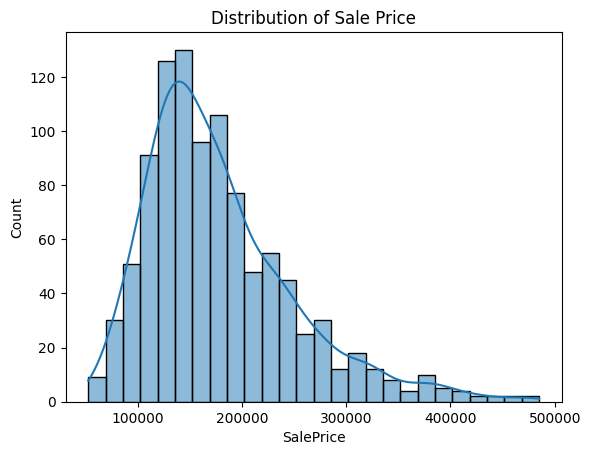

In [320]:
# Visualizing the Sale Price of the Dataframe
sns.histplot(train_df["SalePrice"], kde = True)
plt.title("Distribution of Sale Price")

##### Future Plans for Log Transformation and Predictions:
- The figure indicates that the distribution of SalePrice is **right-skewed**. 
- To normalize the values, I will apply a logarithmic transformation using `log`.
- During predictions and evaluation of model, I will reverse this transformation with `exp`, ensuring interpretability and consistency in scaling.

### Visualizing Numeric Features Against the Target Value
- In this section, I will analyze each major numeric column in relation to `SalePrice` using visualizations to illustrate their relationships.

#### Important Note:

- I will keep all the plots that show outliers because they provide important insights into the data. Plots without outliers will be excluded, as they don’t add significant information to the analysis. After this, I will list the columns that do not contain any outliers.
- To help identify outliers, I will create a new column called is_outlier. This column will label each data point as "Yes" or "No" for being an outlier. I will also use colors to make the outliers stand out visually in the following subplot.
- In the next section, I will display the outliers in subplots for clarity. Additionally, I will remove any columns that do not have outliers to streamline the analysis and focus on the most relevant data.

**<u>Numerical Columns without Outliers:</u>**

    MSSubClass
    OverallCond
    BsmtUnfSF
    1stFlrSF
    2ndFlrSF
    BsmtFullBath
    HalfBath
    Fireplaces
    GarageYrBlt
    GarageCars
    WoodDeckSF
    3SsnPorch
    ScreenPorch
    PoolArea

#### Individual Plots with Outliers

##### <u>Scatterplot of "LotFrontage" vs. "SalePrice"

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

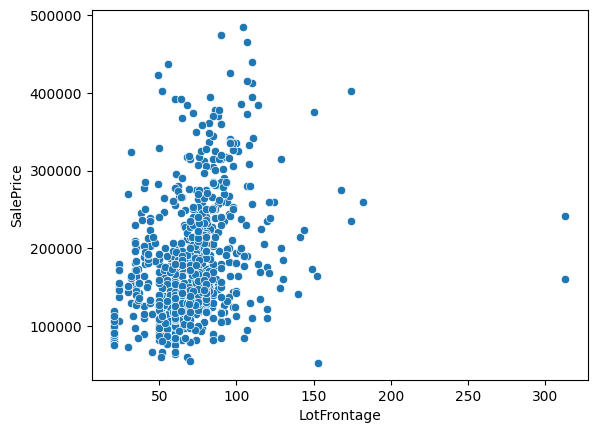

In [321]:
# Scatterplot between them
sns.scatterplot(data = train_df, x = "LotFrontage", y = "SalePrice")

**The plot indicates that records with `LotFrontage` greater than 300 are outliers and will be removed in the preprocessing steps**

In [322]:
# Checking the records for LotFrontage
train_df.query("LotFrontage > 300")
# Drop ID 1299, 935 (Later)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
51,51,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
463,463,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000


<br>

##### <u>Scatterplot of "LotArea" vs. "SalePrice"

<Axes: xlabel='LotArea', ylabel='SalePrice'>

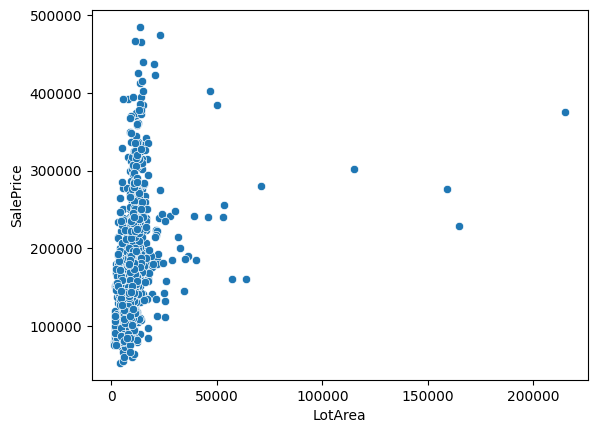

In [323]:
# Plotting the relationship
sns.scatterplot(data = train_df, x = "LotArea", y = "SalePrice")

**Based on the X-axis labels, records with LotArea exceeding 100,000 should be removed from the DataFrame as they are considered outliers.**

In [324]:
# Querying 
train_df.query("LotArea > 100000")
# Drop ID 336, 314, 707, 250

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
451,451,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
454,454,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
479,479,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
524,524,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000


<br>

##### <u>Scatterplot of "OverallQual" vs. "SalePrice"

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

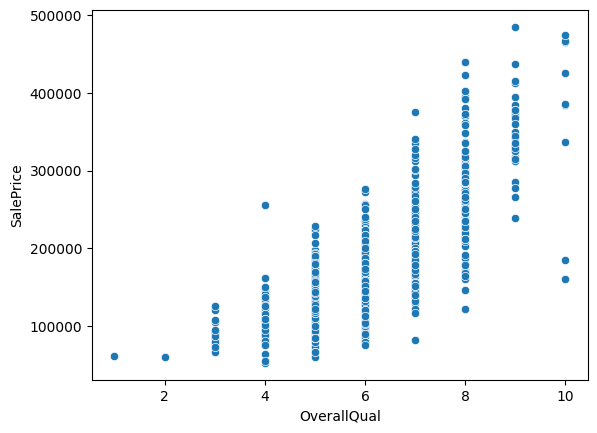

In [325]:
# Scatterplot between the OverallQual and SalePrice
sns.scatterplot(x = "OverallQual", y = "SalePrice", data = train_df)

**This is an ordinal feature since Overall Quality is rated on a scale of 1 to 10, with higher ratings correlating to higher sale prices.**

In [326]:
# Querying records
train_df.query("OverallQual == 10")
# Drop maybe - ID 524 (Low Price, Low Frontage)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
16,16,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
51,51,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
86,86,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
435,435,995,20,RL,96.0,12456,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2007,Hip,CompShg,CemntBd,CmentBd,Stone,230.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1172,Unf,0,528,1700,GasA,Ex,Y,SBrkr,1718,0,0,1718,1,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,786,TA,TA,Y,216,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,337500
536,536,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636,Unf,0,442,2078,GasA,Ex,Y,SBrkr,2084,0,0,2084,1,0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,2007.0,Fin,3,1220,TA,TA,Y,188,45,0,0,0,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
676,676,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1282,Unf,0,1351,2633,GasA,Ex,Y,SBrkr,2633,0,0,2633,1,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
733,733,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,VinylSd,VinylSd,BrkFace,922.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,56,Unf,0,2336,2392,GasA,Ex,Y,SBrkr,2392,0,0,2392,0,0,2,0,3,1,Ex,8,Typ,1,Ex,Attchd,2003.0,Fin,3,968,TA,TA,Y,248,105,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
739,739,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,NaN,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
980,980,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,272.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1280,Unf,0,402,1682,GasA,Ex,Y,SBrkr,1742,590,0,2332,1,0,2,1,3,1,Ex,9,Typ,1,Ex,BuiltIn,2008.0,Fin,3,846,TA,TA,Y,196,134,0,0,0,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000


<br>

##### <u>Scatterplot of "YearBuilt" vs. "SalePrice"

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

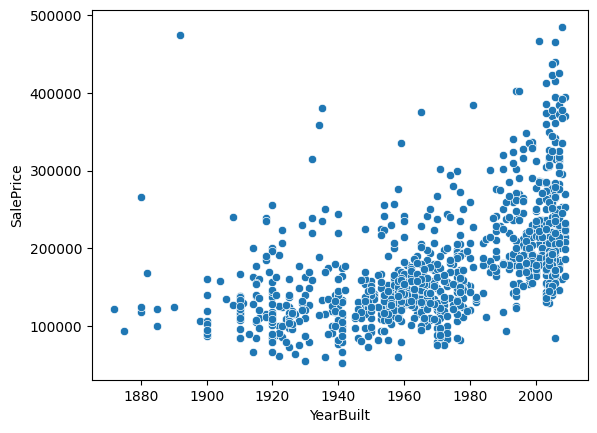

In [327]:
# Plot
sns.scatterplot(data = train_df, x = "YearBuilt", y = "SalePrice")

**There is one outlier with a year earlier than 1900 and a price exceeding 400,000.**

In [328]:
# Querying
train_df.query("YearBuilt < 1900 & SalePrice > 400000")
# Drop ID 186

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
739,739,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,NaN,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


<br>

##### <u>Scatterplot of "YearRemodAdd" vs. "SalePrice"

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

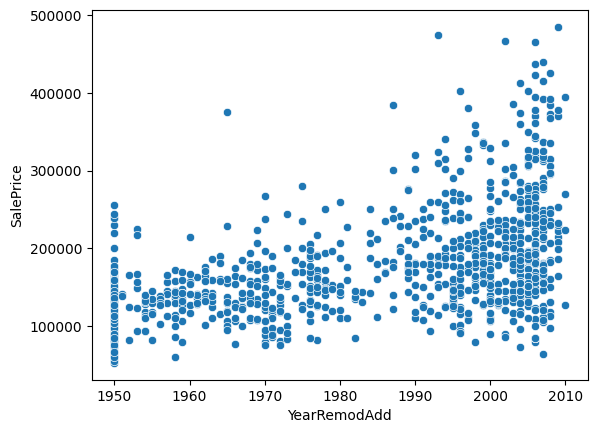

In [329]:
# Plot
sns.scatterplot(data = train_df, x = "YearRemodAdd", y = "SalePrice")

**One outlier is present, featuring a Year of Remodeling before 1970 and a corresponding price greater than 300,000.**

In [330]:
# Querying
train_df.query("YearRemodAdd < 1970 & SalePrice > 300000")
# Drop 314 ID

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
454,454,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


<br>

##### <u>Scatterplot of "MasVnrArea" vs. "SalePrice"

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

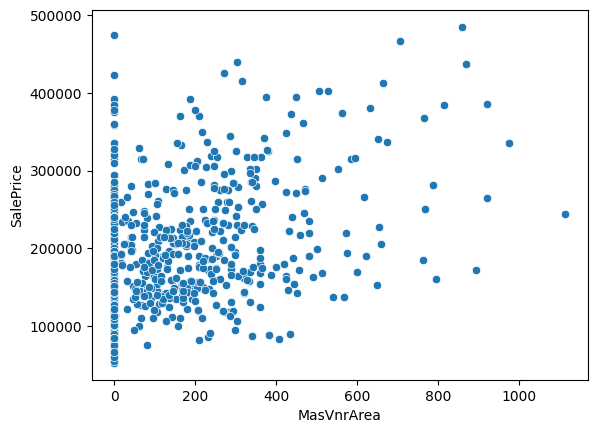

In [331]:
# Plot
sns.scatterplot(data = train_df, x = "MasVnrArea", y = "SalePrice")

**One outlier is identified in the Masonry Veneer Area, with a measurement greater than 1,000 square feet.**

In [332]:
# Querying
train_df.query("MasVnrArea > 1000")
# Drop 71

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
101,101,71,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880,Unf,0,343,2223,GasA,Ex,Y,SBrkr,2223,0,0,2223,1,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1973.0,Fin,2,516,TA,TA,Y,300,0,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000


<br>

##### <u>Scatterplot of "BsmtFinSF1" vs. "SalePrice"

<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

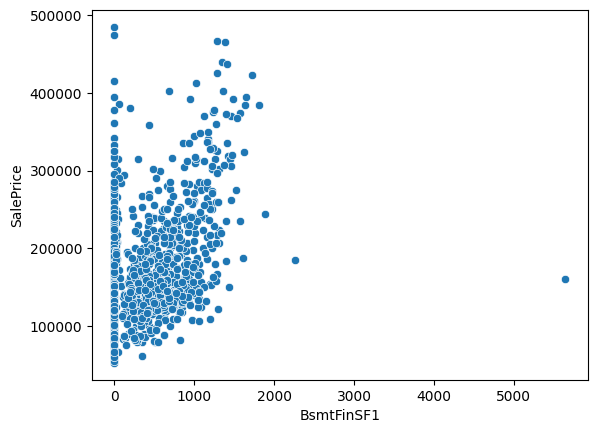

In [333]:
# Plot
sns.scatterplot(data = train_df, x = "BsmtFinSF1", y = "SalePrice")

**Here, there is one outlier in the Type 1 Finished Area more than 5000 Square Feet!**

In [334]:
# Querying 
train_df.query("BsmtFinSF1 > 5000")
# Drop 1299

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
51,51,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<br>

##### <u>Scatterplot of "BsmtFinSF2" vs. "SalePrice"

<Axes: xlabel='BsmtFinSF2', ylabel='SalePrice'>

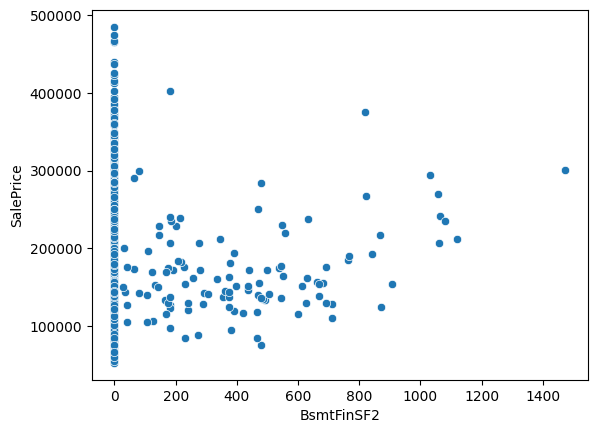

In [335]:
# Plot
sns.scatterplot(data = train_df, x = "BsmtFinSF2", y = "SalePrice")

**Here, we identify one outlier that will be addressed in the next code chunk for further analysis.**

In [336]:
# Querying
train_df.query("0 < BsmtFinSF2 < 400 & SalePrice > 375000")
# Drop 662

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
497,497,662,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1994,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,528.0,Gd,TA,PConc,Gd,Gd,No,GLQ,1361,Rec,180,88,1629,GasA,Ex,Y,SBrkr,1686,762,0,2448,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1994.0,RFn,3,711,TA,TA,Y,517,76,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,402000


<br>

##### <u>Scatterplot of "TotalBsmtSF" vs. "SalePrice"

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

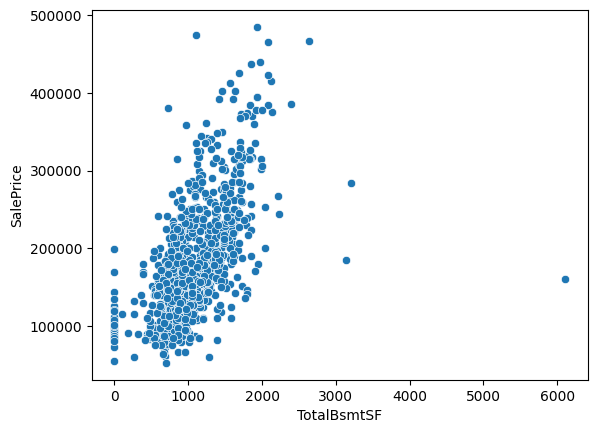

In [337]:
# Plot
sns.scatterplot(data = train_df, x = "TotalBsmtSF", y = "SalePrice")

**Here, there is one outlier in the Total Basment Area more than 50000 Square Feet!**

In [338]:
# Querying
train_df.query("TotalBsmtSF > 5000")
# Drop 1299

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
51,51,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<br>

##### <u>Scatterplot of "LowQualFinSF" vs. "SalePrice"

<Axes: xlabel='LowQualFinSF', ylabel='SalePrice'>

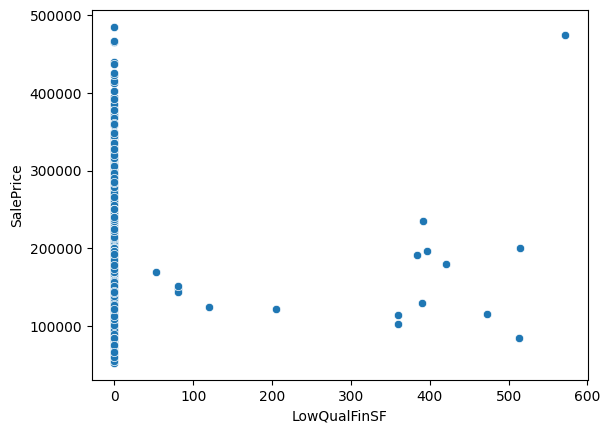

In [339]:
# Plot
sns.scatterplot(data = train_df, x = "LowQualFinSF", y = "SalePrice")

**Here, we have identified one outlier that will be analyzed in the next code chunk.**

In [340]:
# Querying 
train_df.query("LowQualFinSF > 500")
# Drop 186

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
20,20,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,NaN,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
277,277,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,110,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
739,739,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,NaN,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


<br>

##### <u>Scatterplot of "GrLivArea" vs. "SalePrice"

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

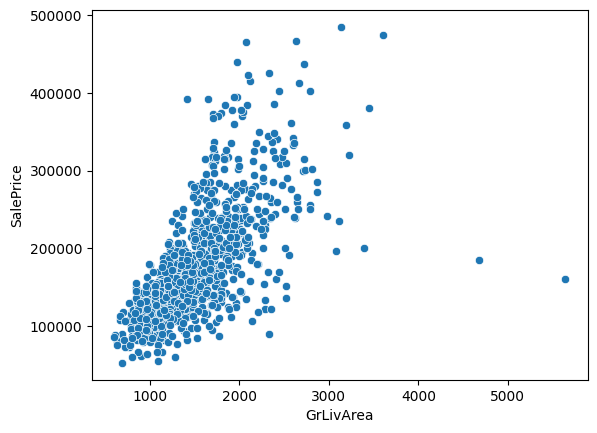

In [341]:
# Plot
sns.scatterplot(data = train_df, x = "GrLivArea", y = "SalePrice")

**Here, there are two outliers in the Living Area more than 4000 Square Feet!**

In [342]:
# Querying
train_df.query("GrLivArea > 4000")
# Drop 1299. 524

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
51,51,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
86,86,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<br>

##### <u>Scatterplot of "BsmtHalfBath" vs. "SalePrice"

<Axes: xlabel='BsmtHalfBath', ylabel='SalePrice'>

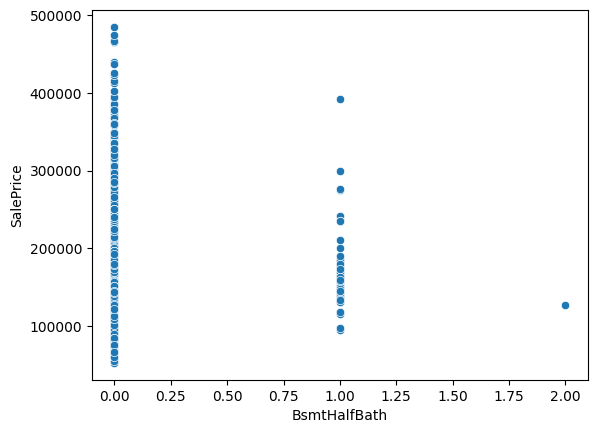

In [343]:
# Plot
sns.scatterplot(data = train_df, x = "BsmtHalfBath", y = "SalePrice")

**Here, there is one outlier that will be queried in next code chunk**

In [344]:
# Querying
train_df.query("BsmtHalfBath == 2")
# Drop 955

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
790,790,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1975,1975,Flat,Tar&Grv,WdShing,Plywood,BrkFace,250.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,945,Unf,0,0,945,GasA,TA,Y,SBrkr,980,0,0,980,0,2,2,0,4,0,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


<br>

##### <u>Scatterplot of "FullBath" vs. "SalePrice"

<Axes: xlabel='FullBath', ylabel='SalePrice'>

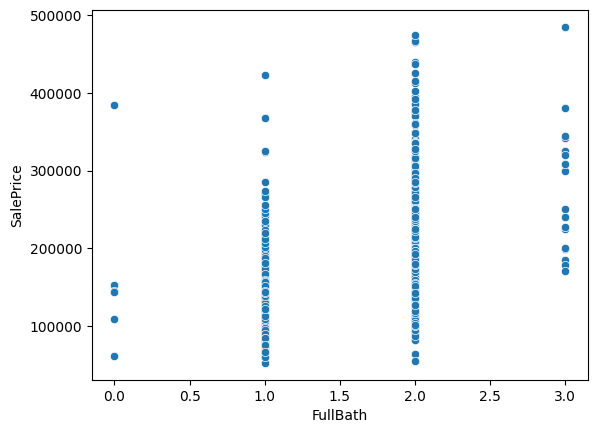

In [345]:
# Plot
sns.scatterplot(data = train_df, x = "FullBath", y = "SalePrice")

**Here, we note one outlier that will be assessed in the following code chunk**

In [346]:
# Querying
train_df.query("FullBath == 0 & SalePrice > 350000")
# Drop 54

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
407,407,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,NaN,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


<br>

##### <u>Scatterplot of "BedroomAbvGr" vs. "SalePrice"

<Axes: xlabel='BedroomAbvGr', ylabel='SalePrice'>

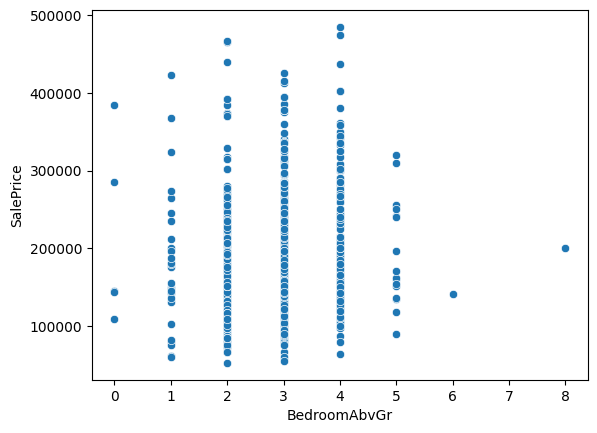

In [347]:
# Plot
sns.scatterplot(data = train_df, x = "BedroomAbvGr", y = "SalePrice")

**Here, there are two outliers that will be queried in next code chunk**

In [348]:
# Querying
train_df.query("BedroomAbvGr > 5")
# Drop 636, 844

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
277,277,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,110,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
438,438,844,90,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,Duplex,1Story,5,4,1961,1961,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1800,1800,GasA,Ex,N,SBrkr,1800,0,0,1800,0,0,2,0,6,2,TA,10,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,141000


<br>

##### <u>Scatterplot of "KitchenAbvGr" vs. "SalePrice"

<Axes: xlabel='KitchenAbvGr', ylabel='SalePrice'>

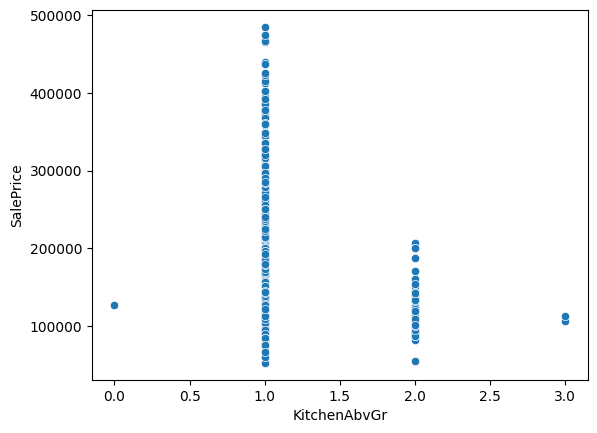

In [349]:
# Plot
sns.scatterplot(data = train_df, x = "KitchenAbvGr", y = "SalePrice")

**Two outliers are present where the number of kitchens is 3 and the sale price is significantly low.**

In [350]:
# Querying
train_df.query("KitchenAbvGr == 3")
# Drop 810, 49

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,234,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,5,5,1898,1965,Hip,CompShg,AsbShng,AsbShng,NaN,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,849,849,GasA,TA,N,FuseA,1075,1063,0,2138,0,0,2,0,2,3,TA,11,Typ,0,NaN,Detchd,1910.0,Unf,2,360,Fa,Po,N,40,156,0,0,0,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000
394,394,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000


<br>

##### <u>Scatterplot of "TotRmsAbvGrd" vs. "SalePrice"

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

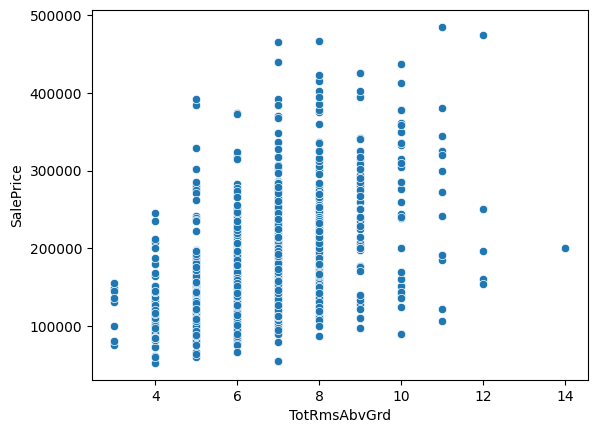

In [351]:
# Plot
sns.scatterplot(data = train_df, x = "TotRmsAbvGrd", y = "SalePrice")

**Here, there is one outlier when the Total Rooms are 14.**

In [352]:
# Querying
train_df.query("TotRmsAbvGrd == 14")
# Drop 636

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
277,277,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,110,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


<br>

##### <u>Scatterplot of "GarageArea" vs. "SalePrice"

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

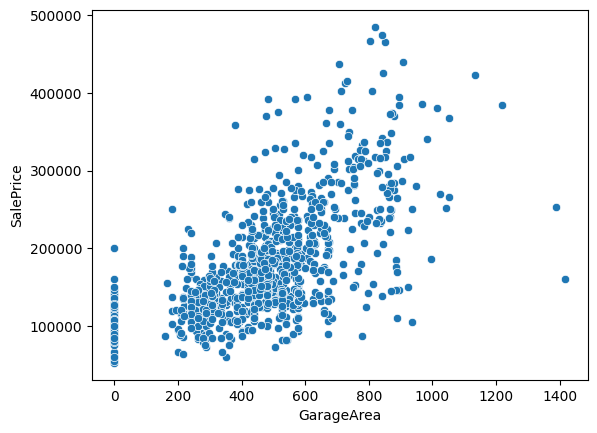

In [353]:
# Scatterplot
sns.scatterplot(x = "GarageArea", y = "SalePrice", data = train_df)

**The plot indicates that as the Garage Area increases, the house value (SalePrice) also increases.** <br>
**Two outliers will be addressed in the next code chunk.**

In [354]:
# Querying
train_df.query("GarageArea > 1300")
# Drop 1299, 582

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
51,51,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
477,477,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,GasA,Ex,Y,SBrkr,2042,0,0,2042,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009.0,RFn,3,1390,TA,TA,Y,0,90,0,0,0,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293


<br>

##### <u>Scatterplot of "OpenPorchSF" vs. "SalePrice"

<Axes: xlabel='OpenPorchSF', ylabel='SalePrice'>

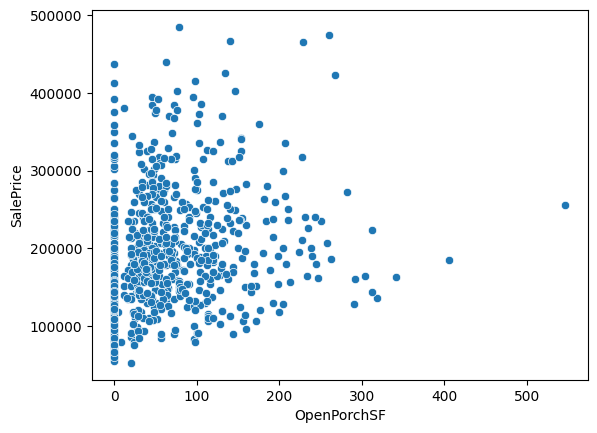

In [355]:
# Plot
sns.scatterplot(data = train_df, x = "OpenPorchSF", y = "SalePrice")

**Here, there is one outlier when Open Porch Area is more than 500 Square Feet!**

In [356]:
# Querying
train_df.query("OpenPorchSF > 500")
# Drop 1329

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
418,418,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493,Unf,0,1017,1510,GasW,Ex,Y,SBrkr,1584,1208,0,2792,0,0,2,0,5,1,TA,8,Mod,2,TA,Detchd,1920.0,Unf,2,520,Fa,TA,Y,0,547,0,0,480,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


#### Defining the list of Outliers
- By looking at the visualizations, I will define the list of IDs that are ***outliers.***
- I noticed that some `IDs` appear as outliers in multiple columns because there is overlap in the data. This means that the same IDs are considered outliers in different plots.

In [357]:
# Defining list of outlier ID's
outlier_ids = [1299, 935, 336, 314, 707, 250, 524, 186, 314, 71, 662, 955, 54, 636, 844, 810, 49, 582, 1329]

#### Defining a new column for outliers

- I will create a new column called is_outlier to indicate whether each data point is an outlier. This column will use "Yes" for outliers and "No" for non-outliers.

In [358]:
# Assuming 'outlier_ids' is a list of outlier IDs
train_df['is_outlier'] = train_df['Id'].apply(lambda x: 'Yes' if x in outlier_ids else 'No')

In [359]:
# Viewing the dataframe again for confirmation
train_df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_outlier
0,0,149,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,120.0,TA,TA,PConc,Gd,TA,No,GLQ,680,Unf,0,400,1080,GasA,Ex,Y,SBrkr,1080,0,0,1080,1,0,1,0,3,1,Gd,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,141000,No
1,1,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,4,1950,1950,Gable,CompShg,MetalSd,MetalSd,BrkCmn,161.0,TA,TA,CBlock,TA,TA,No,LwQ,185,Unf,0,524,709,GasA,TA,Y,SBrkr,979,224,0,1203,1,0,1,0,3,1,Gd,5,Typ,1,TA,Detchd,1950.0,Unf,1,352,TA,TA,Y,0,0,248,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000,No
2,2,1336,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,5,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,360.0,TA,TA,CBlock,Gd,TA,No,ALQ,686,Unf,0,664,1350,GasA,TA,Y,SBrkr,1334,0,0,1334,0,1,2,0,2,1,TA,6,Typ,1,TA,Attchd,1977.0,RFn,2,630,TA,TA,Y,0,16,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,167900,No
3,3,805,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,LwQ,812,Unf,0,124,936,GasA,TA,Y,SBrkr,1128,0,0,1128,0,0,1,0,2,1,TA,5,Min1,0,NaN,Attchd,1954.0,Unf,1,286,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2006,WD,Family,118000,No
4,4,1396,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,245.0,Gd,TA,PConc,Gd,Gd,Gd,Unf,0,Unf,0,1094,1094,GasA,Ex,Y,SBrkr,1133,1349,0,2482,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,Fin,3,642,TA,TA,Y,144,39,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213,No


#### Defining the list of Outlier Features
- In this section, I will define a list of the features that contains at least one outlier in its whole distribution.

In [360]:
outlier_features = ["LotFrontage", "LotArea", "OverallQual", "YearBuilt",
                   "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
                   "TotalBsmtSF", "LowQualFinSF", "GrLivArea", "BsmtHalfBath",
                   "FullBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd",
                   "GarageArea", "OpenPorchSF"]

#### Visualizing all Outlier in the Features
- Now, let's create subplots for all the features, highlighting the outliers with color in each plot. This will help clarify the concept further. We will remove these outliers in the upcoming sections.

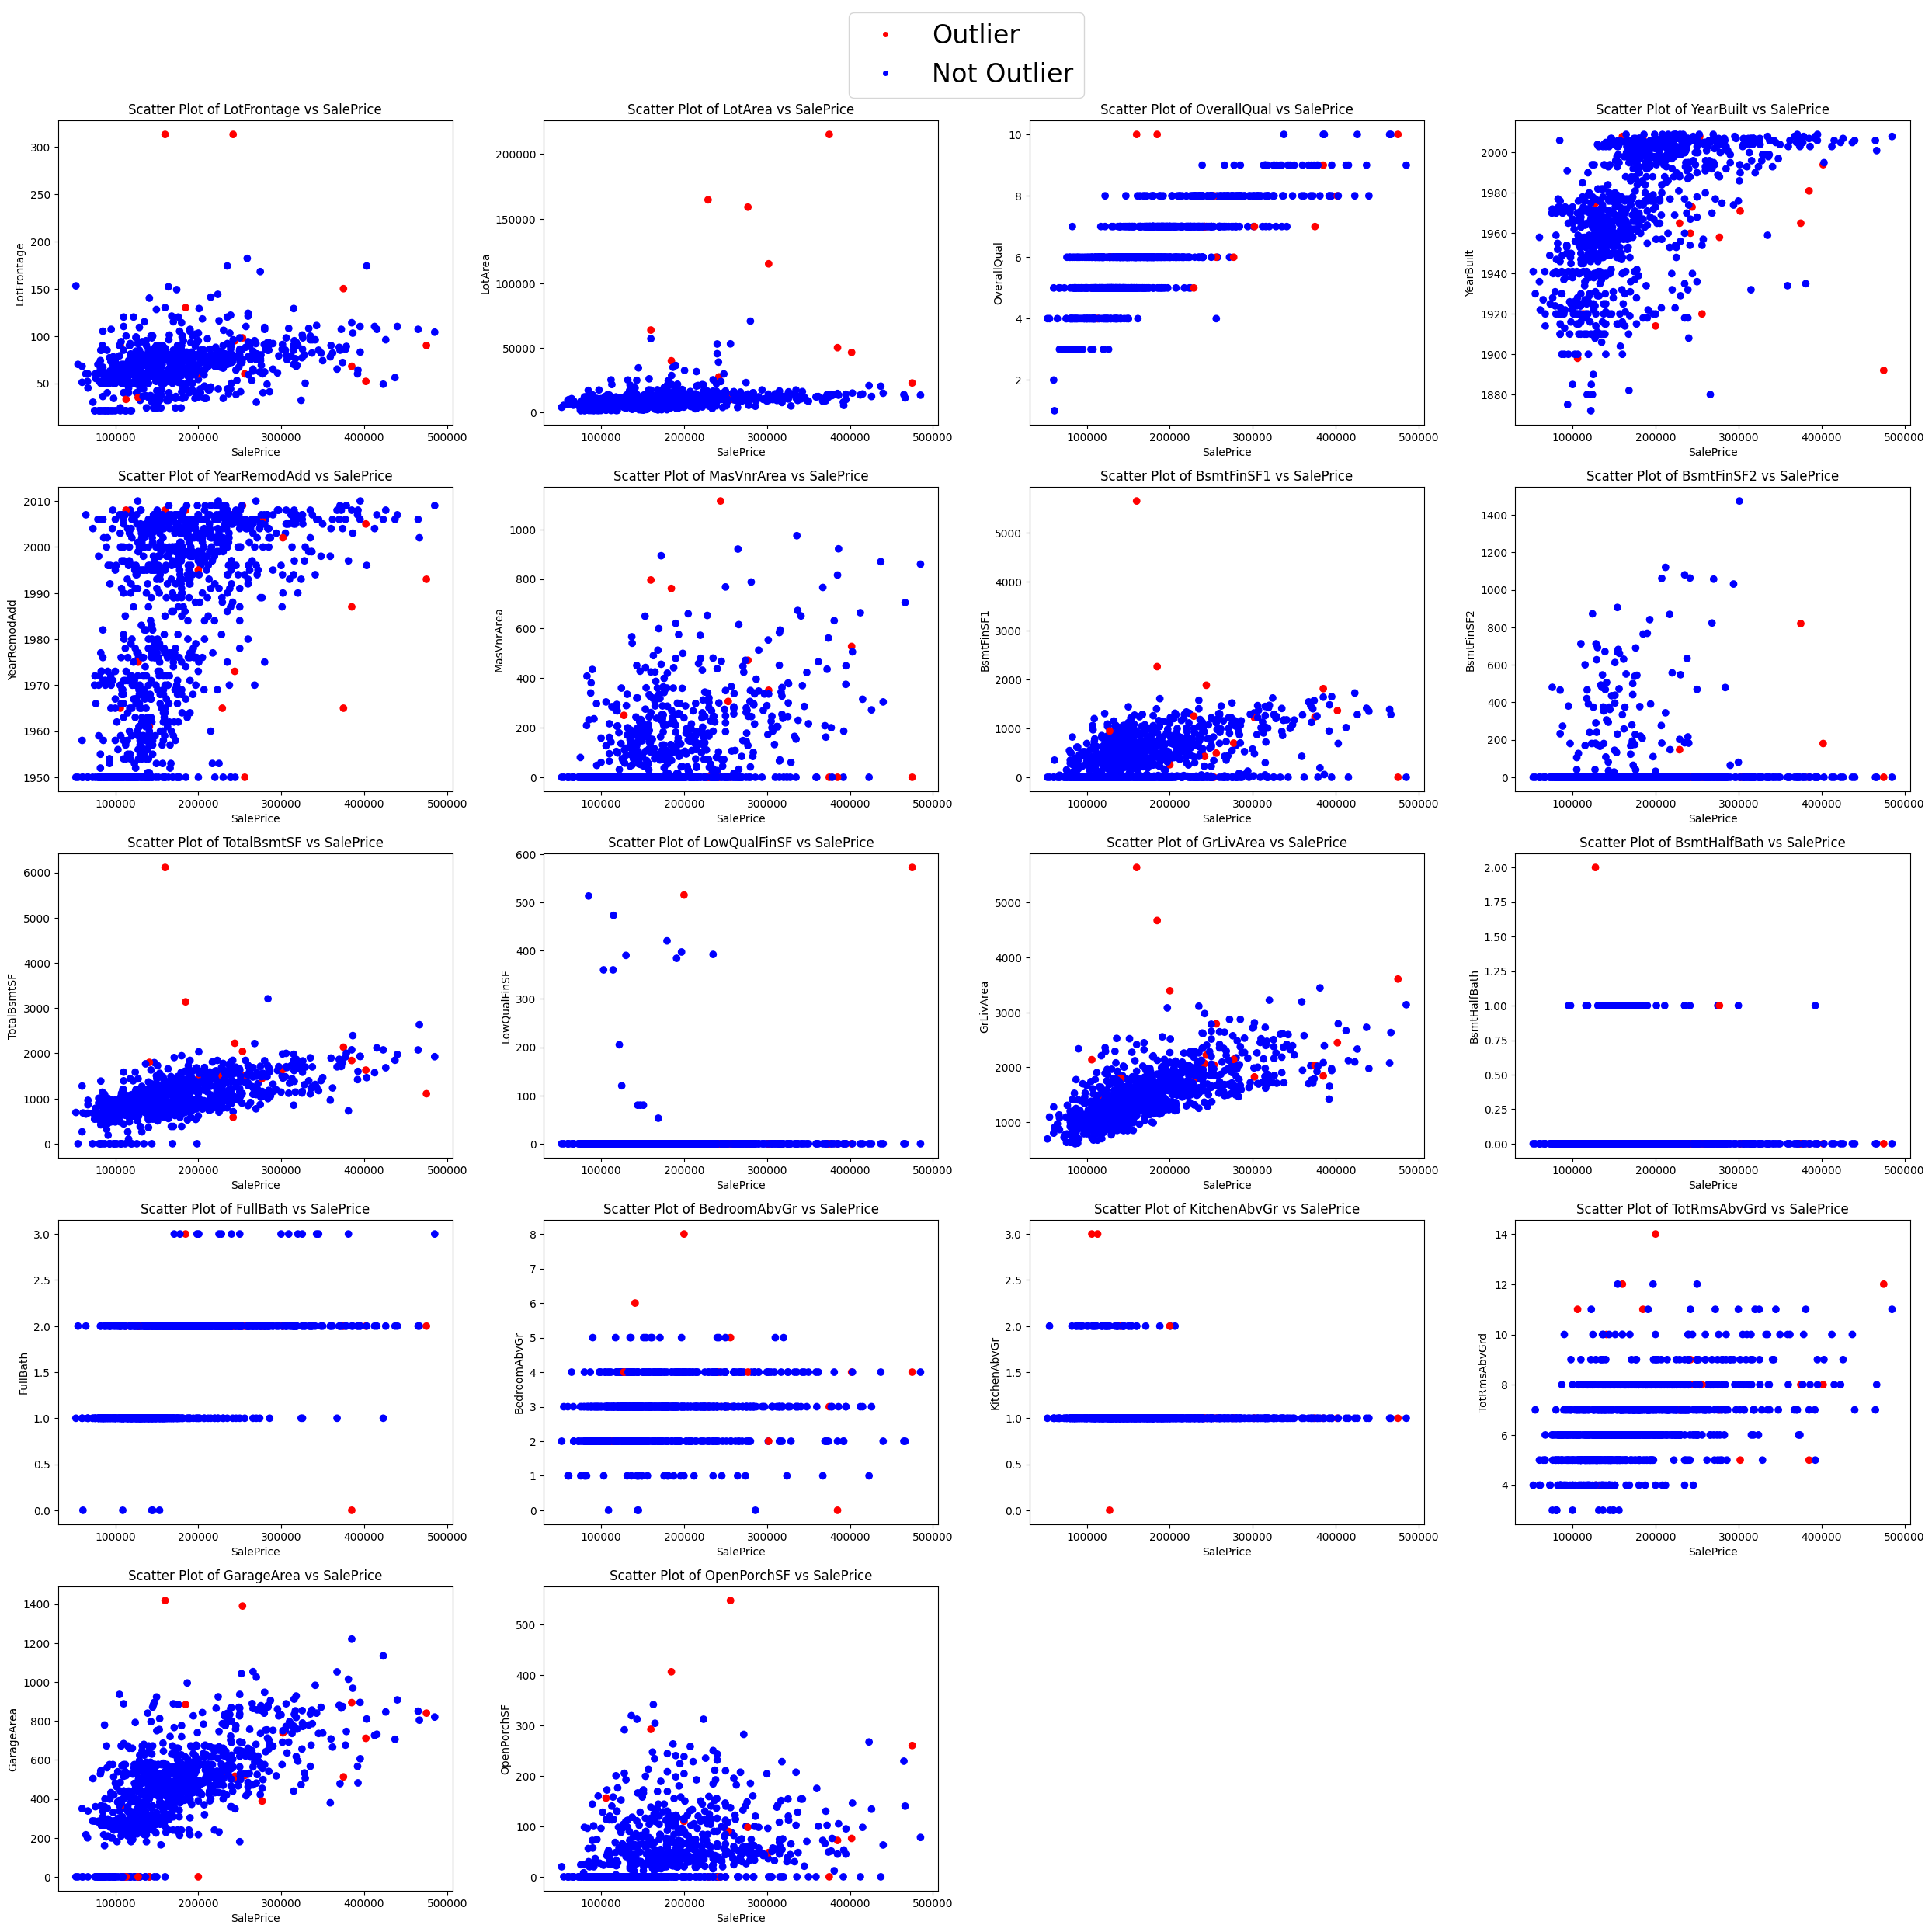

In [361]:
# Number of rows and columns
n_cols = 4
n_rows = (len(outlier_features) + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(25, 5 * n_rows))
axs = axs.flatten()

## Looping through each feature and create a scatter plot
for i, feature in enumerate(outlier_features):
    scatter = axs[i].scatter(train_df["SalePrice"], train_df[feature], 
                             c = train_df["is_outlier"].map({"Yes": "red", "No": "blue"}))
    axs[i].set_title(f"Scatter Plot of {feature} vs SalePrice")
    axs[i].set_xlabel("SalePrice")
    axs[i].set_ylabel(feature)

# Add a legend for the entire figure
handles = [plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="red", label="Outlier"),
           plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="blue", label="Not Outlier")]
fig.legend(handles=handles, loc="upper center", fontsize=24)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis("off")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Relationship Between the `Neighborhood` and `SalePrice`
- **In this analysis, I will examine how the value of the neighborhood impacts the SalePrice to determine its relevance for inclusion in the modeling process.**

Text(0.5, 1.0, 'SalePrice vs Neighborhood (Boxplot)')

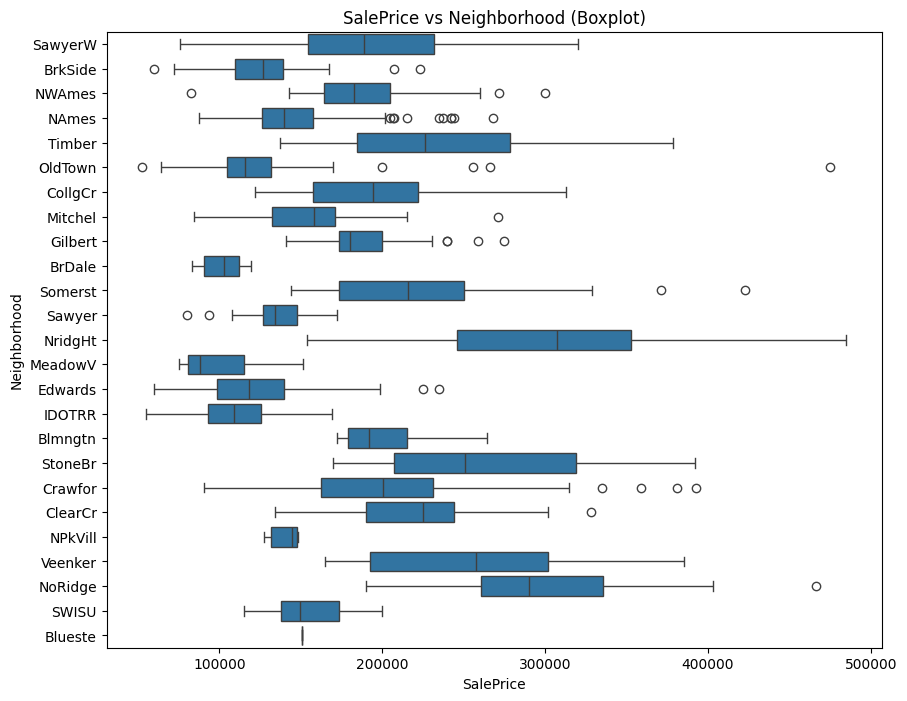

In [362]:
# Visualizing them both with the help of boxplot
plt.figure(figsize = (10,8))
sns.boxplot(data = train_df, x = "SalePrice", y = "Neighborhood")
plt.title("SalePrice vs Neighborhood (Boxplot)")

**The `Neighborhood` value has a substantial impact on `SalePrice`, highlighting the necessity of including it in the modeling.**

### Visualizing the Correlation betweemn Numeric Columns and `SalePrice`
- Here, I will be using the `corr()` and `heatmap()` of the seaborn to visualize the correlation between the columns.

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

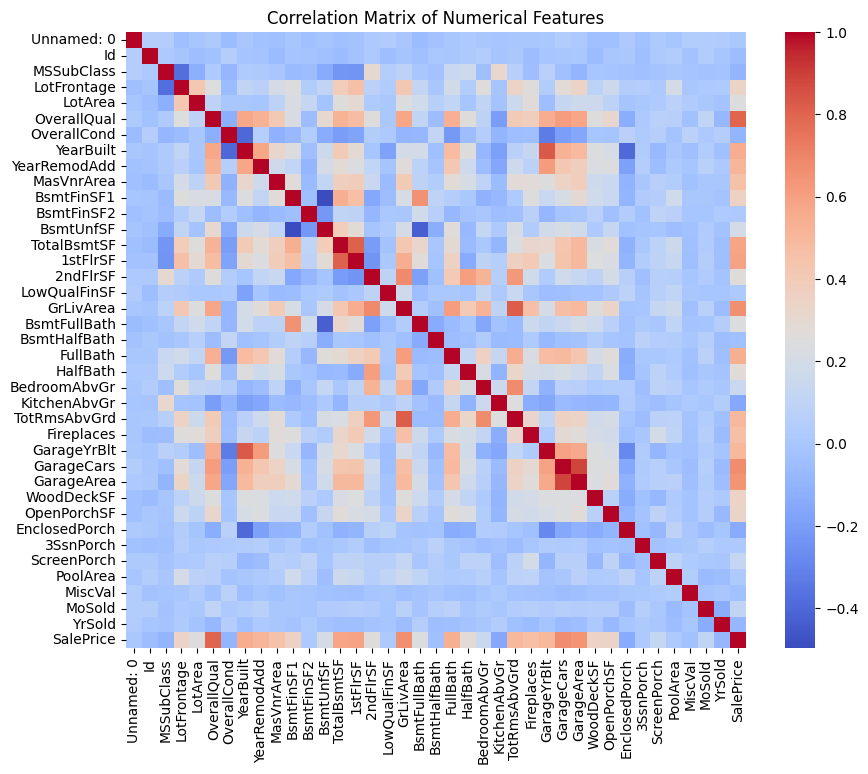

In [363]:
# Numerical Features List
numerical_feats = train_df.columns[train_df.dtypes != "O"]

# Visualizing Correlation with help of heatmap
plt.figure(figsize = (10,8))
sns.heatmap(train_df[numerical_feats].corr(), cmap = "coolwarm")
plt.title("Correlation Matrix of Numerical Features")

## Step-2: Data Preprocessing
- In this section, I will be applying some preprocessing steps on the combined dataframe that is the combintion of the training data and testing data.

### Outlier Removal
- During the EDA, we identified specific record `IDs` as outliers in the DataFrame. In this subsection, I will remove these outliers from the DataFrame, excluding `SalePrice`, to ensure cleaner data for further analysis.

In [364]:
# Viewing the Outlier's Again
print(outlier_ids)

[1299, 935, 336, 314, 707, 250, 524, 186, 314, 71, 662, 955, 54, 636, 844, 810, 49, 582, 1329]


In [365]:
# Filtering the Training Dataframe
train_df = train_df[train_df["Id"].isin(outlier_ids) == False]

**Explanation:**
- The code `train_df["Id"].isin(outlier_ids)` does the below things:
- It first checks if the record's `ID` is in the outlier ID's. If it is there, then it returns `True` (DATA WE DO NOT NEED).
- If it is not there, then it returns `False`. It matches with the condition defined in the bracket and will return `True` to `train_df[True]` (DATA THAT WE NEED).

In [366]:
# Resetting the Index 
train_df = train_df.reset_index(drop = True)

### Transforming the Target Value `SalePrice`
- Let’s replot the `SalePrice` histogram to examine the distribution of the target variable we aim to predict.

<Axes: xlabel='SalePrice', ylabel='Count'>

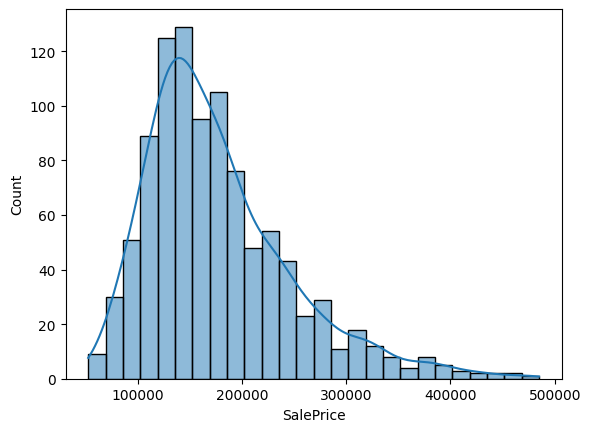

In [367]:
# Plot of SalePrice
sns.histplot(train_df["SalePrice"], 
             kde = True)

- The histogram shows a significant right skew, indicating that the SalePrice distribution is uneven. 
- To normalize this distribution, I will apply a log transformation using `log`, which will bring higher values together and will remove the skewness. 
- After the transformation, I will recheck the distribution to assess the impact.

In [368]:
# Applying Logarithmic Scale 
train_df["SalePrice"] = np.log(train_df["SalePrice"])

#### Viewing the Distribution again after applying Log Transformation

<Axes: xlabel='SalePrice', ylabel='Count'>

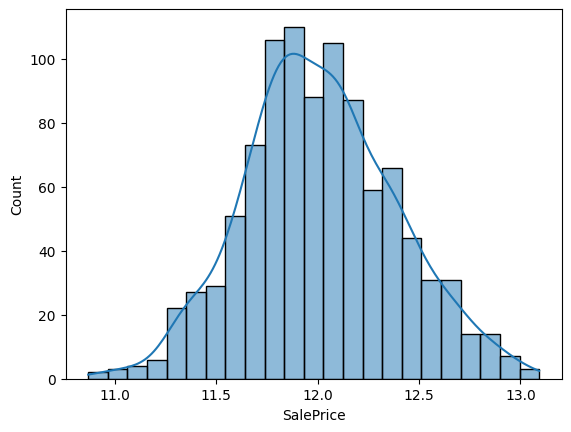

In [369]:
# Plot of SalePrice
sns.histplot(train_df["SalePrice"], 
             kde = True)

**Now that we've applied the log transformation, the SalePrice distribution is much easier to work with. This makes it better for analysis and helps improve our predictions.**

### Dropping Irrelevant Columns
- Now, I will remove some columns from my dataframe that are not irrelevant to the prediction of the salePrice, and the columns are:

1. **Unnamed: 0**: This is the index column that was created when importing the dataset
2. **Id:** This is the unique identifier for a record and that is not needed in further stages for prediction.
3. **is_outlier:** This was the temporary column for the Outliers that we dont need any more.

In [370]:
# Removing the columns `id` and `Unnamed` 
train_df = train_df.drop(["Unnamed: 0", "Id", "is_outlier"], axis = 1)
test_df = test_df.drop(["Unnamed: 0", "Id"], axis = 1)

### Dealing with Missing Values in the Dataframe

First, I will be checking the number of Null Values in all the NAN columns to deal with them later. 

In [371]:
# Dataframe of top 10 NAN Values in the Columns of Training Data
nan_df = pd.DataFrame(train_df.isnull().sum().sort_values(ascending = False))

# Top 20 NAN Columns
nan_df.head(20) 

,0
PoolQC,978
MiscFeature,949
Alley,918
Fence,800
MasVnrType,586
FireplaceQu,460
LotFrontage,183
GarageYrBlt,57
GarageCond,57
GarageType,57


- I will also be dropping the `SalePrice`, because it is the Target Values and not needed in preprocessing steps.

#### Viewing the heatmap of NA Values to visualize the Values in Columns

<Axes: >

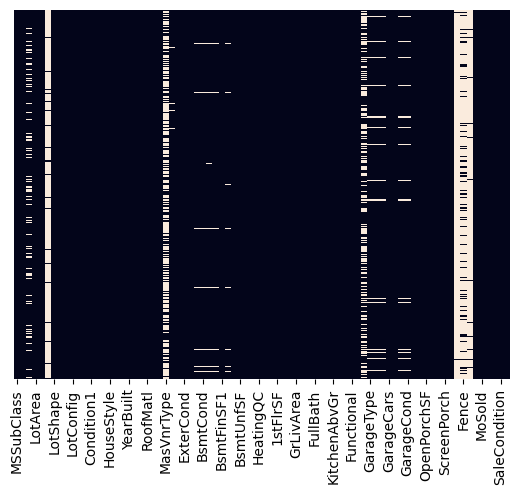

In [372]:
# Heatmap of NA Values
sns.heatmap(train_df.isnull(), yticklabels = False, cbar = False)

This helps us to visualize how NA Values are distributed across the columns in the dataset.

#### Filling the NA Values in remaining Features of the dataset
- Finally, I will be using the `fillna` to fill the NA Values in the columns that we visualized in the previous part.
- Here, I will be using `mean` for the numerical continous features, and `mode` for the categorical features.
- **PS: Here, in other columns where something is absent I will be filling the NA Values with some text instead of any statistical method.**|

#### Checking all Columns for `NaN` Values and Substituting them
- In this stage, I will fill `NA` Vaalues and also visualize the distributions of NA features in the dataset.
- These visualizations will help identify patterns, trends, and potential outliers, providing valuable insights that will inform the feature engineering process.

##### `MiscFeature` Column

In [373]:
# Checking what values are there
train_df["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

##### `Alley` Column

In [374]:
# Checking Unique Values
train_df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

**Here, NaN means "No Alley" in the sense of data description! So will replace them with some text instead of NaN Values**

In [375]:
# Filling them with something
train_df["Alley"] = train_df["Alley"].fillna("No Alley")
test_df["Alley"] = test_df["Alley"].fillna("No Alley")

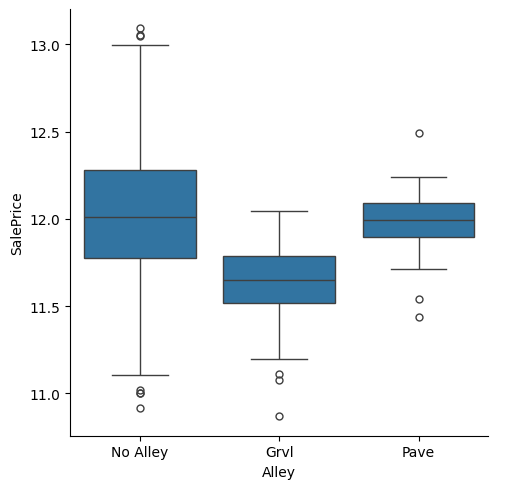

In [376]:
# Visualizing the column
sns.catplot(data = train_df, x = "Alley", y = "SalePrice", kind = "box")

##### `Fence` Column

In [377]:
# Checking Values
train_df["Fence"].unique()

array([nan, 'GdWo', 'GdPrv', 'MnPrv', 'MnWw'], dtype=object)

**Here, NaN means "No Fence" in the sense of data description! So will replace them with some text instead of NaN Values**

In [378]:
# Filling them with something
train_df["Fence"] = train_df["Fence"].fillna("No Fence")
test_df["Fence"] = test_df["Fence"].fillna("No Fence")

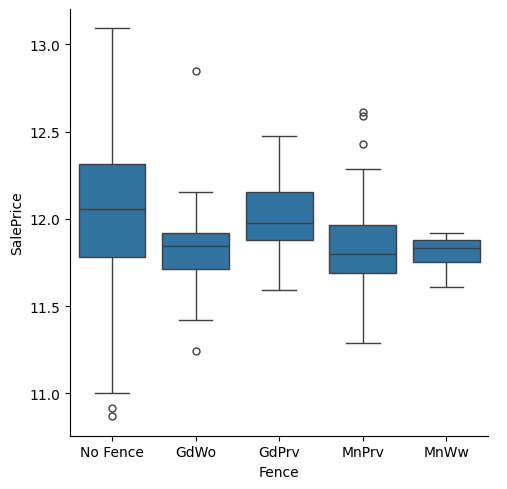

In [379]:
# Visualizing the column
sns.catplot(data = train_df, x = "Fence", y = "SalePrice", kind = "box")

##### `MasVnrType` Column

In [380]:
# Checking Values
train_df["MasVnrType"].unique()

array(['BrkFace', 'BrkCmn', nan, 'Stone'], dtype=object)

**Here, NaN means "None of Masonry Veneer" in the sense of data description! So will replace them with some text instead of NaN Values**

In [381]:
# Filling them with something
train_df["MasVnrType"] = train_df["MasVnrType"].fillna("None")
test_df["MasVnrType"] = test_df["MasVnrType"].fillna("None")

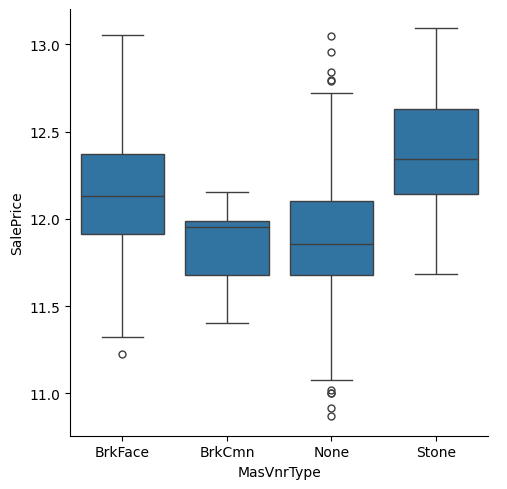

In [382]:
# Visualizing the column
sns.catplot(data = train_df, x = "MasVnrType", y = "SalePrice", kind = "box")

##### `FireplaceQu` Column

In [383]:
# Checking Values
train_df["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [384]:
# Filling them with something
train_df["FireplaceQu"] = train_df["FireplaceQu"].fillna("No Fireplace")
test_df["FireplaceQu"] = test_df["FireplaceQu"].fillna("No Fireplace")

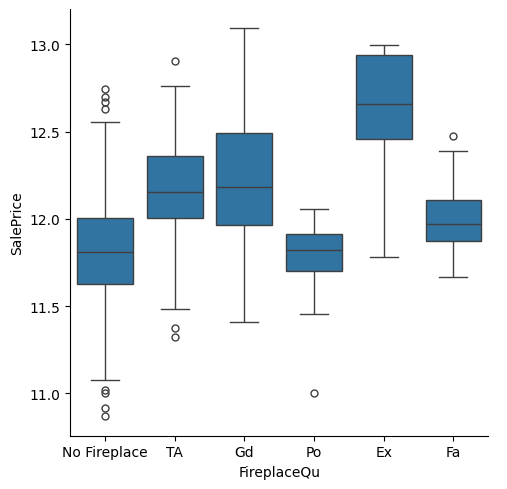

In [385]:
# Visualizing the column
sns.catplot(data = train_df, x = "FireplaceQu", y = "SalePrice", kind = "box")

##### `Fireplaces` Column

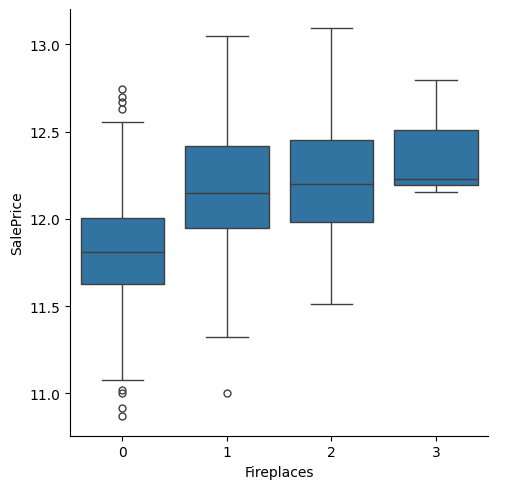

In [386]:
# Visualizing the column
sns.catplot(data = train_df, x = "Fireplaces", y = "SalePrice", kind = "box")

##### `LotFrontage` Column

**Here, there is no mention of NaN Values in data description! So will just replace them with the `mean` instead of NaN Values**

In [387]:
# Filling them with mean
train_df["LotFrontage"] = train_df["LotFrontage"].fillna(train_df["LotFrontage"].mean())
test_df["LotFrontage"] = test_df["LotFrontage"].fillna(train_df["LotFrontage"].mean())

##### `GarageQual` Column

In [388]:
# Checking Values
train_df["GarageQual"].unique()

array([nan, 'TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

**Here, NaN means "No Garage" in the sense of data description! So will replace them with some text instead of NaN Values** ***(This will be repeated in some next couple of columns)***

In [389]:
# Filling them with something
train_df["GarageQual"] = train_df["GarageQual"].fillna("No Garage")
test_df["GarageQual"] = test_df["GarageQual"].fillna("No Garage")

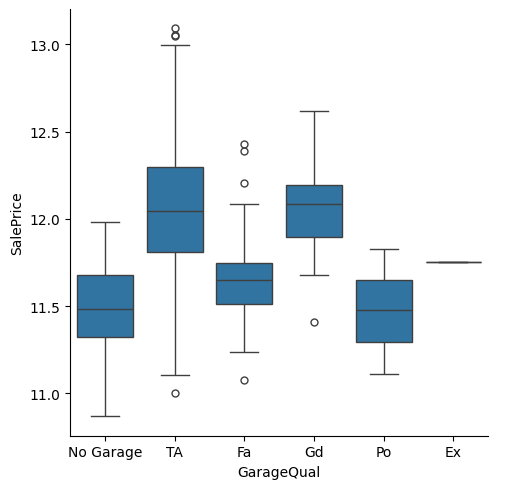

In [390]:
# Visualizing the column
sns.catplot(data = train_df, x = "GarageQual", y = "SalePrice", kind = "box")

##### `GarageType` Column

In [391]:
# Checking Values
train_df["GarageType"].unique()

array([nan, 'Detchd', 'Attchd', 'BuiltIn', 'Basment', '2Types', 'CarPort'],
      dtype=object)

In [392]:
# Filling them with something
train_df["GarageType"] = train_df["GarageType"].fillna("No Garage")
test_df["GarageType"] = test_df["GarageType"].fillna("No Garage")

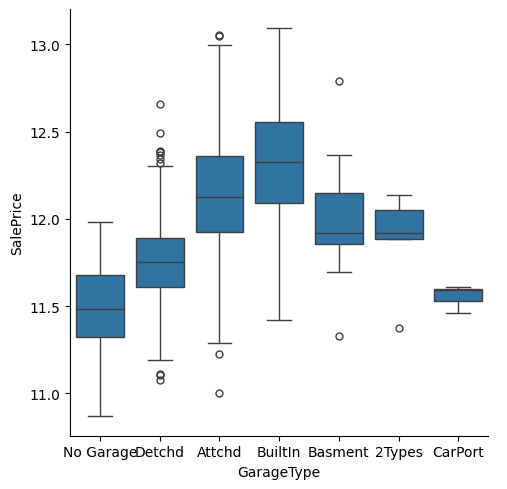

In [393]:
# Visualizing the column
sns.catplot(data = train_df, x = "GarageType", y = "SalePrice", kind = "box")

##### `GarageFinish` Column

In [394]:
# Checking Values
train_df["GarageFinish"].unique()

array([nan, 'Unf', 'RFn', 'Fin'], dtype=object)

In [395]:
# Filling them with something
train_df["GarageFinish"] = train_df["GarageFinish"].fillna("No Garage")
test_df["GarageFinish"] = test_df["GarageFinish"].fillna("No Garage")

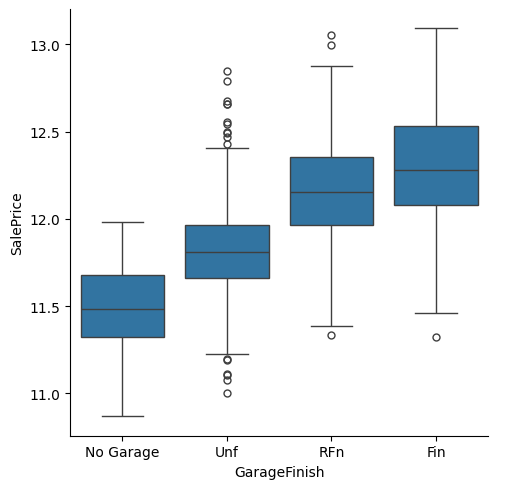

In [396]:
# Visualizing the column
sns.catplot(data = train_df, x = "GarageFinish", y = "SalePrice", kind = "box")

##### `GarageCond` Column

In [397]:
# Checking Values
train_df["GarageCond"].unique()

array([nan, 'TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [398]:
# Filling them with something
train_df["GarageCond"] = train_df["GarageCond"].fillna("No Garage")
test_df["GarageCond"] = test_df["GarageCond"].fillna("No Garage")

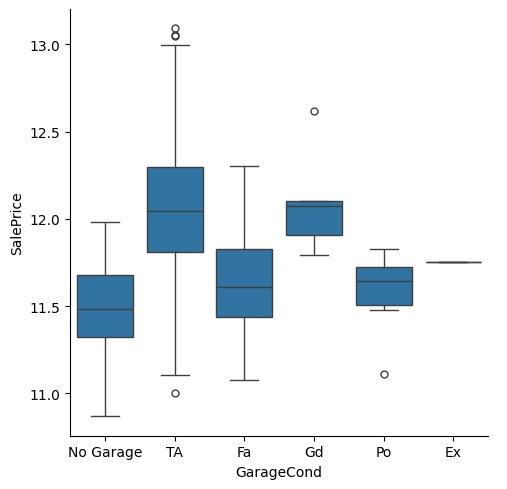

In [399]:
# Visualizing the column
sns.catplot(data = train_df, x = "GarageCond", y = "SalePrice", kind = "box")

##### `GarageYrBlt` Column

**I genuinely don't think we need this column at all. Because, generally it should be the same as of the `YearBuilt` column of the house i.e., the same year when the house was built! In next code chunk I will see correlation between them.**

In [400]:
# Correlation
print(train_df["GarageYrBlt"].corr(train_df["YearBuilt"]))

0.8289783374609172


**We have strong relation between them, I will drop this in the next section and just keep and use the `YearBuilt` feature.**

##### `BsmtExposure` Column

In [401]:
# Checking Values
train_df["BsmtExposure"].unique()

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)

**Here, NaN means "No Basement" in the sense of data description! So will replace them with some text instead of NaN Values**

In [402]:
# Filling them with something
train_df["BsmtExposure"] = train_df["BsmtExposure"].fillna("No Basement")
test_df["BsmtExposure"] = test_df["BsmtExposure"].fillna("No Basement")

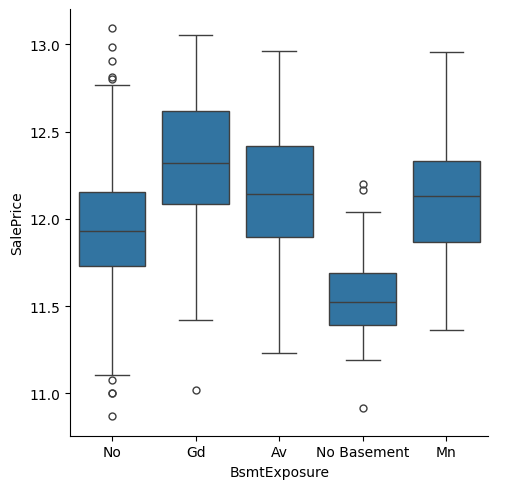

In [403]:
# Visualizing the column
sns.catplot(data = train_df, x = "BsmtExposure", y = "SalePrice", kind = "box")

`BsmtFinType2` Column

In [404]:
# Checking Values
train_df["BsmtFinType2"].unique()

array(['Unf', 'Rec', nan, 'GLQ', 'LwQ', 'BLQ', 'ALQ'], dtype=object)

In [405]:
# Filling them with something
train_df["BsmtFinType2"] = train_df["BsmtFinType2"].fillna("No Basement")
test_df["BsmtFinType2"] = test_df["BsmtFinType2"].fillna("No Basement")

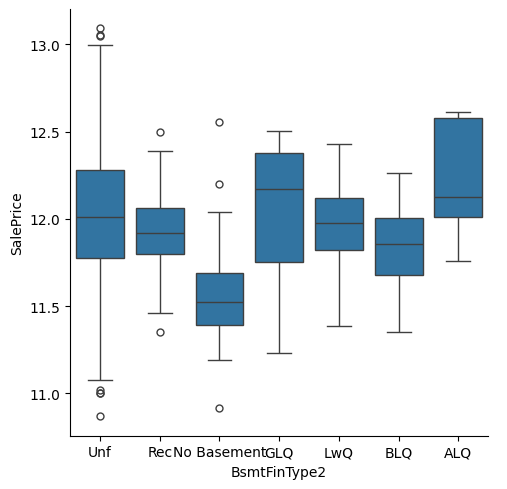

In [406]:
# Visualizing the column
sns.catplot(data = train_df, x = "BsmtFinType2", y = "SalePrice", kind = "box")

##### `BsmtQual` Column

In [407]:
# Checking Values
train_df["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

**Here, NaN means actually "No Basement" in the sense of data description! So will replace them with some text instead of NaN Values**

In [408]:
# Filling them with something
train_df["BsmtQual"] = train_df["BsmtQual"].fillna("No Basement")
test_df["BsmtQual"] = test_df["BsmtQual"].fillna("No Basement")

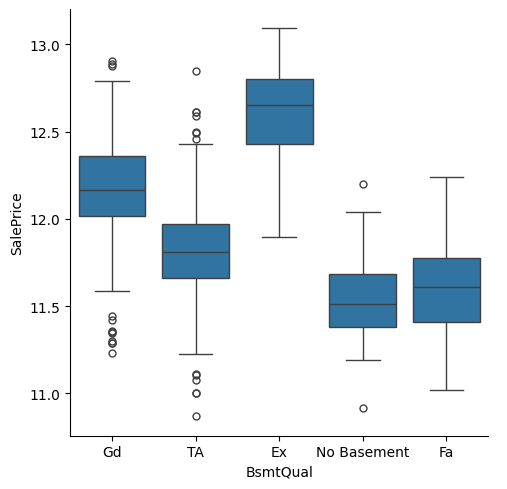

In [409]:
# Visualizing the column
sns.catplot(data = train_df, x = "BsmtQual", y = "SalePrice", kind = "box")

##### `BsmtFinType1` Column

In [410]:
# Checking Values
train_df["BsmtFinType1"].unique()

array(['GLQ', 'LwQ', 'ALQ', 'Unf', nan, 'BLQ', 'Rec'], dtype=object)

In [411]:
# Filling them with something
train_df["BsmtFinType1"] = train_df["BsmtFinType1"].fillna("No Basement")
test_df["BsmtFinType1"] = test_df["BsmtFinType1"].fillna("No Basement")

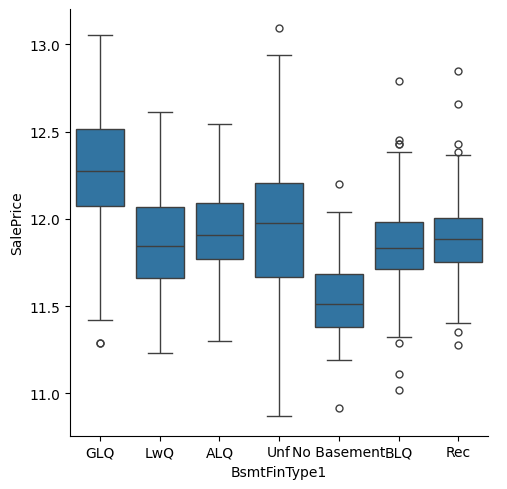

In [412]:
# Visualizing the column
sns.catplot(data = train_df, x = "BsmtFinType1", y = "SalePrice", kind = "box")

##### `BsmtCond` Column

In [413]:
# Checking Values
train_df["BsmtCond"].unique()

array(['TA', 'Gd', 'Fa', nan, 'Po'], dtype=object)

**Here, NaN means "No Basement" in the sense of data description! So will replace them with some text instead of NaN Values**

In [414]:
# Filling them with something
train_df["BsmtCond"] = train_df["BsmtCond"].fillna("No Basement")
test_df["BsmtCond"] = test_df["BsmtCond"].fillna("No Basement")

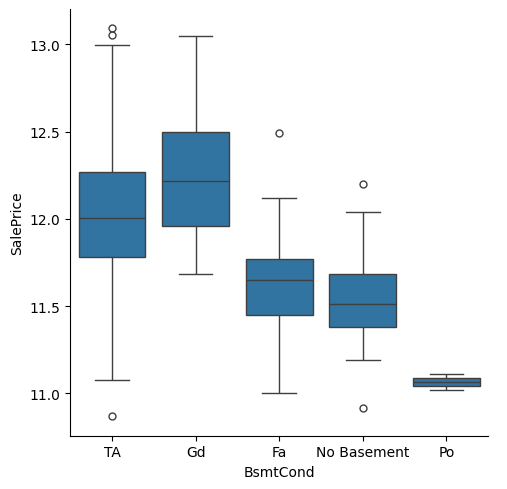

In [415]:
# Visualizing the column
sns.catplot(data = train_df, x = "BsmtCond", y = "SalePrice", kind = "box")

##### `MasVnrArea` Column

**Here, there is no mention of NaN Values in data description! So will just replace them with the `mean` instead of NaN Values**

In [416]:
# Filling them with 0
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(train_df["MasVnrArea"].mean())
test_df["MasVnrArea"] = test_df["MasVnrArea"].fillna(train_df["MasVnrArea"].mean())

##### `Electrical` Column

In [417]:
# Checking Values
train_df["Electrical"].unique()

array(['SBrkr', 'FuseA', 'FuseP', 'FuseF', nan, 'Mix'], dtype=object)

**Here, I will fill NaN values as `SBrkr`: Standard Circuit Breakers & Romex *(Because, it is standard one if nothing is mentioned)***


In [418]:
# Filling them with something
train_df["Electrical"] = train_df["Electrical"].fillna("SBrkr")
test_df["Electrical"] = test_df["Electrical"].fillna("SBrkr")

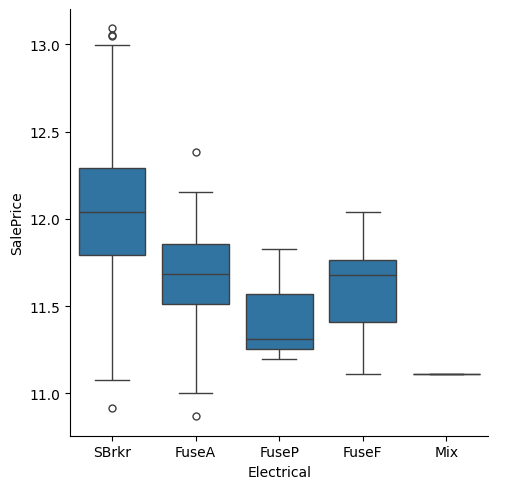

In [419]:
# Visualizing the column
sns.catplot(data = train_df, x = "Electrical", y = "SalePrice", kind = "box")

Let's check the NA Values Again for all the columns and check if there is any column with NA Values Present.

In [420]:
# Checking if there is any columns having NA Values more than 0
train_df.columns[(train_df.isnull().sum() > 0)]

Index(['GarageYrBlt', 'PoolQC', 'MiscFeature'], dtype='object')

- At this moment, all missing values are handled except `GarageYrBlt, PoolQC, MiscFeature` and will be dropping them afterwards.

<Axes: >

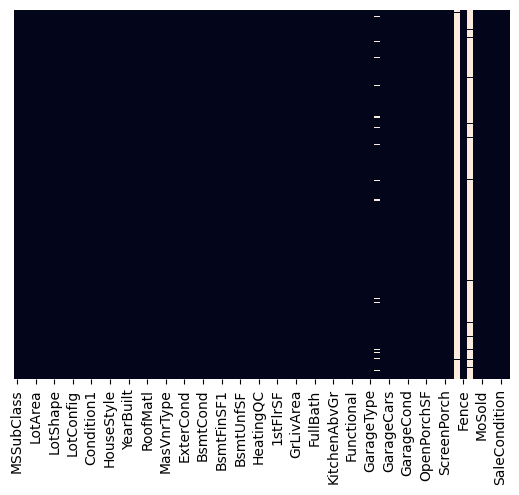

In [421]:
# Heatmap for missing values
sns.heatmap(train_df.isnull(), yticklabels = False, cbar = False)

### Removing some additional Columns

After checking all columns and their visualizations, I have decided to drop some of the features that are listed below and their explanation will also be given.

In [422]:
train_df = train_df.drop(["PoolQC", "Alley", "Fence", "GarageYrBlt", "MiscFeature", "GarageCond", "BsmtFinType2"], axis = 1)
test_df = test_df.drop(["PoolQC", "Alley", "Fence", "GarageYrBlt", "MiscFeature", "GarageCond", "BsmtFinType2"], axis = 1)

#### Explanation why they are dropped:

1. `PoolQC`: High Number of NA Values
2. `Alley`: High Number of NA Values
3. `Fence`: High Number of NA Values
4. `GarageYrBlt`: Strong relation to `YearBuilt`
5. `MiscFeature`: High Number of NA Values
6. `GarageCond`: Very Similar to `GarageQual`
7. `BsmtFinType2`: Similar Trend in Boxplot (No Major Fluctuations)

## Step-3: Feature Engineering
- **In this section, we’ll create new, meaningful features from the existing ones, then drop the original columns after feature engineering.**
- I’ve identified new features based on data descriptions and visualizations — **where EDA greatly aided our feature engineering.**

### Creating new features from existing columns

#### Defining `PropertyAge` Feature
- Creating a new column, PropertyAge, to represent the property's age calculated as **`YrSold - YearBuilt`.**

In [423]:
# Creating for Both Dataframes
train_df["PropertyAge"] = train_df["YrSold"] - train_df["YearBuilt"]
test_df["PropertyAge"] = test_df["YrSold"] - test_df["YearBuilt"]

#### Defining `HouseRemodAge` Feature
- Creating HouseRemodAge to show remodeling age at sale, calculated as **`YrSold - YearRemodAdd`.**

In [424]:
# Creating for Both Dataframes
train_df["HouseRemodAdd"] = train_df["YrSold"] - train_df["YearRemodAdd"]
test_df["HouseRemodAdd"] = test_df["YrSold"] - test_df["YearRemodAdd"]

#### Defining `TotalSF` Feature
- Adding a new column, TotalSF, to indicate the total square footage of the house at sale.

In [425]:
# Creating for Both Dataframes
train_df["TotalSF"] = train_df["1stFlrSF"] + train_df["2ndFlrSF"] + train_df["BsmtFinSF1"] + train_df["BsmtFinSF2"]
test_df["TotalSF"] = test_df["1stFlrSF"] + test_df["2ndFlrSF"] + test_df["BsmtFinSF1"] + test_df["BsmtFinSF2"]

#### Defining `TotalArea` Feature
- Creating TotalArea to represent the house's total area at sale: **`GrLivArea + TotalBsmtSF`**.

In [426]:
# Creating for Both Dataframes
train_df["TotalArea"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]
test_df["TotalArea"] = test_df["GrLivArea"] + test_df["TotalBsmtSF"]

#### Defining `TotalBaths` Feature
- Adding `TotalBaths` to indicate the total number of bathrooms in the house.

In [427]:
# Creating for Both Dataframes
train_df["TotalBaths"] = train_df["FullBath"] + train_df["BsmtFullBath"] + 0.5 * (train_df["HalfBath"] + train_df["BsmtHalfBath"])
test_df["TotalBaths"] = test_df["FullBath"] + test_df["BsmtFullBath"] + 0.5 * (test_df["HalfBath"] + test_df["BsmtHalfBath"])

#### Defining `TotalPorchSF` Feature
- Creating `TotalPorchSF` to represent the total square footage of all porches in the house.

In [428]:
# Creating for Both Dataframes
train_df["TotalPorchSF"] = train_df["WoodDeckSF"] + train_df["OpenPorchSF"] + train_df["EnclosedPorch"] + train_df["3SsnPorch"] + train_df["ScreenPorch"]
test_df["TotalPorchSF"] = test_df["WoodDeckSF"] + test_df["OpenPorchSF"] + test_df["EnclosedPorch"] + test_df["3SsnPorch"] + test_df["ScreenPorch"]

### Dropping all the Old Columns used earlier 

In [429]:
# Dropping old columns from both dataframes
train_df = train_df.drop(
                    ["YrSold", "YearBuilt", "YearRemodAdd", "1stFlrSF",
                    "2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2", "GrLivArea", 
                    "TotalBsmtSF", "FullBath", "BsmtFullBath", "HalfBath",
                    "BsmtHalfBath", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
                    "3SsnPorch", "ScreenPorch"], axis = 1)

test_df = test_df.drop(
                    ["YrSold", "YearBuilt", "YearRemodAdd", "1stFlrSF",
                    "2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2", "GrLivArea", 
                    "TotalBsmtSF", "FullBath", "BsmtFullBath", "HalfBath",
                    "BsmtHalfBath", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
                    "3SsnPorch", "ScreenPorch"], axis = 1)

### Correlation Between the New Numerical Columns

<Axes: >

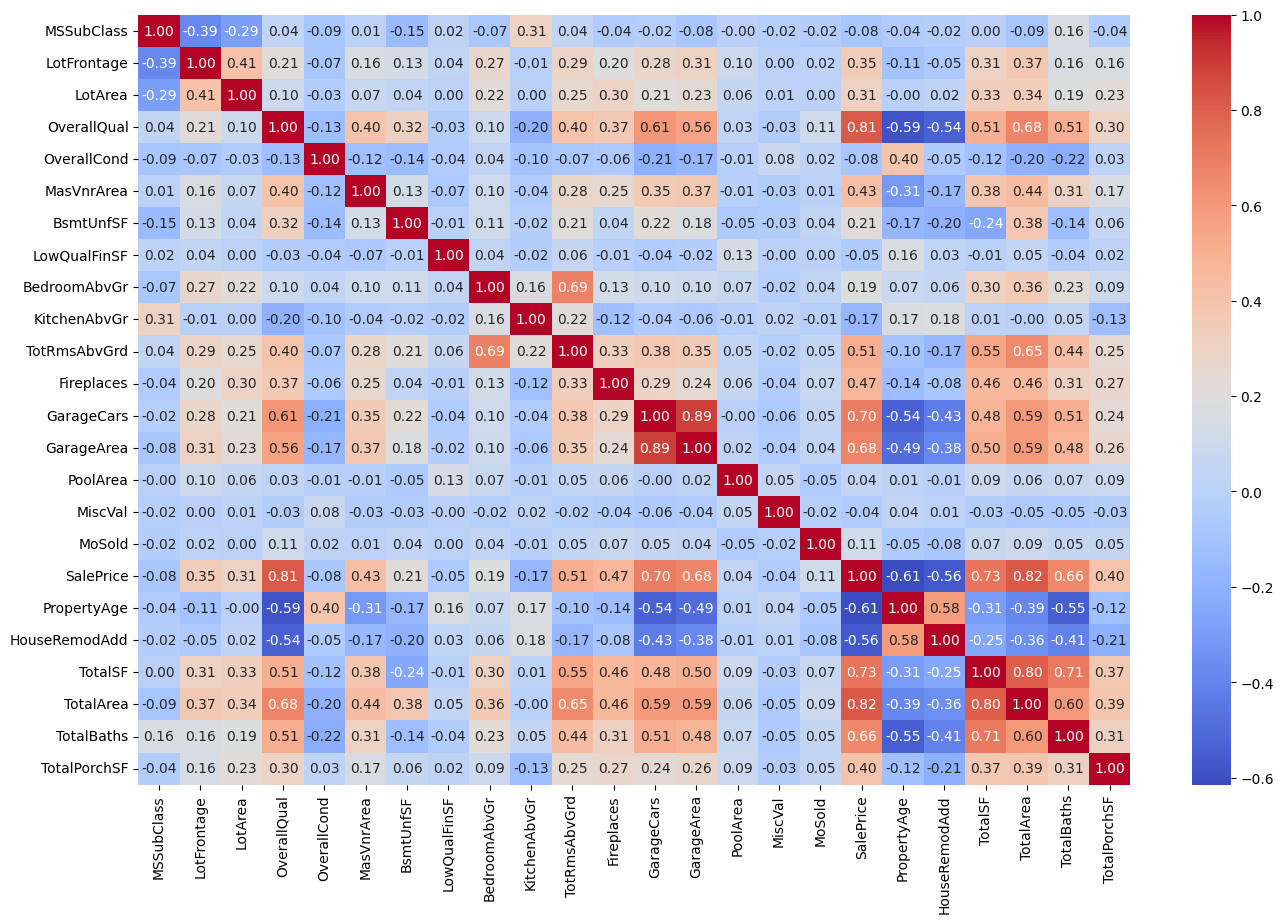

In [430]:
# Correlation Matrix
plt.figure(figsize = (16,10))
sns.heatmap(train_df.corr(numeric_only = True), annot=True, cmap='coolwarm', fmt=".2f")

### Dropping the column `GarageArea`
- Due to the strong correlation between `GarageCars` and `GarageArea`, we'll retain only one of these columns to avoid redundancy.

In [431]:
# Dropping the Column
train_df = train_df.drop(["GarageArea"], axis = 1)
test_df = test_df.drop(["GarageArea"], axis = 1)

## Step-4: Data Transformation

### Combining Training and Testing Datasets for Transformation

In [432]:
# First Checking the Dataframe shape
print(f"Shape of Training Dataframe: {train_df.shape}") # start:982
print(f"Shape of Testig Dataframe: {test_df.shape}") #982:end

Shape of Training Dataframe: (982, 60)
Shape of Testig Dataframe: (446, 59)


In [433]:
# First Dropping the SalePrice
train_X = train_df.drop(["SalePrice"], axis = 1)

# Assigning the Testing Dataframe Copy
test_X = test_df.copy()

# Assignig the Training target Values
train_Y = train_df["SalePrice"]

# Combining both the dataframes without the target value
combined_df = [train_X, test_X]
combined_df = pd.concat(combined_df).reset_index(drop = True)

In [434]:
# Shape of the New Dataframe and Target Values
print(f"Shape of New combined Dataframe: {combined_df.shape}") 
print(f"Shape of Target Values in Training: {train_Y.shape}") 

Shape of New combined Dataframe: (1428, 59)
Shape of Target Values in Training: (982,)


### Examining Dataset Features for transformation
- In this section, I will examine the dataset's columns and perform various operations on them..

#### Analyzing Numerical Columns
- Let's examine the numerical columns in the dataset, which we will standardize later.

In [435]:
# checking which columns are numerical (Not selecting the Object Datatype)
num_feats = list(train_X.select_dtypes(include = ["int64", "float64"]).columns)
num_feats

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'PropertyAge',
 'HouseRemodAdd',
 'TotalSF',
 'TotalArea',
 'TotalBaths',
 'TotalPorchSF']

#### Analyzing Catergorical Columns
- Now, let's review the categorical columns in the dataset, which we will encode later.

In [436]:
# checking which columns are categorical features
cat_feats = list(train_X.select_dtypes(include = ["category", "object"]).columns)
cat_feats

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

### Transformation of the data present in the dataframe 
- In this section, I will be making preprocessing pipeline that will be applying `ColumnTransformer` on the columns, and that transformer will be containing various transformation such as `OneHotEncoder, StandardScaler, OrdinalEncoder` , etc.

#### Different Types of Features

**Now, in the categorical columns, there are two types of categoical columns that are present in the dataframe**:

1. **One Hot Categories**|: They are the columns which don't have any type of inheritance or rankings in their categories/data. Some examples in this dataframe are `Street, LotConfig, RoofStyle`, etc. This type of categories will be applied to the `OneHotEncoder` which will simply creates a binary column for all catgories in that column.
- For Example, we have a dataframe which has a category named as `Colour`, which takes the values: `Red, Green, Blue`. Then, It will creates the following columns:

<!------ USED A ONLINE MARKDOWN TABLE CREATOR ---->
| Red | Green | Blue |
|:---:|:-----:|:----:|
|  1  |   0   |   0  |
|  0  |   1   |   0  |
|  0  |   0   |   1  |

2. **Ordinal Categories:** They are the columns which have some type of clear, meaningfull order or rankings in their data. Some examples in this dataframe are `LotShape, LandSlope, OverallQual`, etc. This type of categories will be applied to the `OrdinalEncoder` which will be handled in different way.
- For Example, we have a dataframe which has a category named as `Size`, whicht takes the values: `Small, Medium, Large`. Then, it will be in this order:

<!------ USED A ONLINE MARKDOWN TABLE CREATOR AGAIN ---->
| Encoded Variable |  Size  |
|:----------------:|:------:|
|         1        |  Small |
|         2        | Medium |
|         3        |  Large |

**Now, in next code chunk I will be defining this types of columns for this particular dataframe**

In [437]:
# Defining Types Categorical Columns (OneHot, Ordinal)
# OneHot Categories
ohe_feats = ["MSZoning", "Street", "LotConfig", "Neighborhood",
             "Condition1", "Condition2", "BldgType", "HouseStyle",
             "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd",
             "MasVnrType", "Foundation", "Heating", "Electrical",
             "GarageType", "SaleType", "SaleCondition"]

# Ordinal Categories
ord_feats = ["LotShape", "LandContour", "Utilities", "LandSlope",
             "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
             "BsmtExposure", "BsmtFinType1", "HeatingQC", "CentralAir",
             "KitchenQual", "Functional", "FireplaceQu", "GarageFinish",
             "GarageQual", "PavedDrive"]

**Let's see if we have included all the columns of `combined_df` in the aboce code chunk by running a set operation which will be checking if both are same or not.**

In [438]:
# making a list of all above categories
manual_list = num_feats + ohe_feats + ord_feats

# checking the condition
set(manual_list) == set(combined_df.columns)

True

**NOTE:**
- Using `set()` in this comparison helps us determine if `manual_list` contains exactly the same unique column names as those in `combined_df.columns`, simplifying the validation process.
- Sets in Python are unordered collections of unique elements. When we convert a list (or any iterable) to a set, it removes any duplicate elements and disregards the order of elements.
- This directly means that when we compare two sets, the order of items does not matter, and only the presence or absence of items is considered. **That's why I used the `set()` operation to just check if items are there, order doesn't matter here!**

#### Pipeline for Numerical Features

In [439]:
# Numerical Pipeline
num_pipe = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "mean")),
    ("scaler", StandardScaler())
])

# Viewing the Pipeline
num_pipe

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

#### Pipeline for One Hot Columns

In [440]:
# One-Hot Pipeline
ohe_pipe = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore", sparse_output = False))
])

# Viewing the Pipeline
ohe_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

#### Pipeline for Ordinal Columns

In [441]:
# Ordinal Pipeline
ord_pipe = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("ordinal", OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1))
])

# Viewing the Pipeline
ord_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('ordinal',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1))])

#### Making Column Transformer

In [442]:
# Making a New Column Transformer (This will be used later)
col_transf =  ColumnTransformer(transformers = [
    ("num_p", num_pipe, num_feats),
    ("ord_p", ord_pipe, ord_feats),
    ("ohe_p", ohe_pipe, ohe_feats),
    ],
    remainder = "passthrough",
    n_jobs = -1)

##### NOTE: `scikit-learn: set_config()`
- With multiple transformations in a column transformer, it can get tricky to keep track of everything happening inside it.  
- We can use `set_config` to display a diagram of this. 

In [443]:
# Setting the config
set_config(display = "diagram")

In [444]:
# Let's see the column transformer now
col_transf

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num_p',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'MasVnrArea',
                                  'BsmtUnfSF', 'LowQualFinSF', 'BedroomAbvGr',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                  'GarageCars', 'PoolArea', 'MiscVal', 'Mo...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MSZoning', 'Street', 'LotConfig',
                                  'Neighborhood', 'Condition1', 'Condition2',
                                  'BldgType', 'HouseStyle', 'RoofStyle',
                                  'RoofMatl', 'Exterior1st', 'Exterior2nd',
                                  'MasVnrType', 'Foundation', 'Heating',
                                  'Electrical', 'GarageType', 'SaleType',
                                  'SaleCondition'])])

**Here, we can see how much it is easier to visualize the `ColumnTransformer` by just looking at the diagram above! Explanation will be given below:**

#### Explanation of Column Transformer


##### 1. **Numerical Pipeline (`num_p`)**: 

- **`SimpleImputer:`** With the ***Simple Imputer***, I can handle missing values by using the mean strategy, which is super useful for numerical data. Basically, it calculates the average of all the values in a column and fills any missing spots with that average, keeping things consistent and straightforward.

- **`StandardScaler:`** The ***StandardScaler*** makes data easier to work with by putting all values on a similar scale. It does this by adjusting each value so the data has an average of 0 and a standard deviation of 1, which helps models perform better.

##### 2. **Ordinal Pipeline (`ord_p`):**

- **`SimpleImputer:`**  Using the ***SimpleImputer*** with categorical data, I can fill in missing values (like for example "Low," "Medium," "High") with the most common category. This way, the Ordinal Encoder can then assign clear, consistent numeric codes to each rank.

- **`OrdinalEncoder`** The ***OrdinalEncoder*** changes categories with a natural order—like "Low," "Medium," and "High"—into numbers based on their rank (e.g., 1, 2, 3). This keeps the ranking clear for the model to understand.

##### **3. OneHot Pipeline (`ohe_p`):**

- **`SimpleImputer`:** The ***SimpleImputer*** fills in missing values in categorical data by replacing them with the most frequent category, ensuring the dataset is complete and ready for analysis.

- **`OneHotEncoder`:** The One Hot Encoder turns categorical values into a format that can be used by models. It creates new columns for each category, marking them with 1s and 0s to show presence or absence.

##### **4. `remainder (Passthrough):`**

- In the transformer, ***"remainder='passthrough'"*** means that any columns not being transformed will stay the same and pass through unchanged. This way, I keep all the original data while only changing what I need.

#### Seperating the Train and Test Set Again

In [445]:
# Checking if shapes are consistent
print(f"Shape of Final Dataframe: {combined_df.shape}")
print(f"Shape of Training Dataframe: {train_X.shape}")
print(f"Shape of Testig Dataframe: {test_X.shape}")

# Making some new dataframes from the `combined_df`
train_X = combined_df[:982]
test_X = combined_df[982:]

# Check the shapes
print("\nCheck that the datasets are consistent:\n")
print("train_X shape", train_X.shape)
print("train_Y shape:", train_Y.shape)
print("test_X shape:",  test_X.shape)

Shape of Final Dataframe: (1428, 59)
Shape of Training Dataframe: (982, 59)
Shape of Testig Dataframe: (446, 59)

Check that the datasets are consistent:

train_X shape (982, 59)
train_Y shape: (982,)
test_X shape: (446, 59)


#### Making the Preprocessing Pipeline from the `col_transf`

In [446]:
# Preprocessing Pipeline
pp_pipe = Pipeline(steps = [
    ("preprocessing", col_transf)
])

#### Applying the `ColumnTransformer` 

In [447]:
# Fitting and transforming just the Training Dataframe
train_transformed = pp_pipe.fit_transform(train_X)

# Now transforming the testing dataframe from above fitted dataframe
test_transformed = pp_pipe.transform(test_X)

# Making the New Categorical Column Names
ohe_colnames = col_transf.named_transformers_["ohe_p"].get_feature_names_out()

# Making a Final Column Names 
column_names = [
    num_feats
    + ord_feats
    + list(ohe_colnames)
]

# Making New Training Dataframe without the Target Value
train_X = pd.DataFrame(data = train_transformed, columns = column_names).reset_index(drop = True)

# Making New Testing Dataframe 
test_X = pd.DataFrame(data = test_transformed, columns = column_names).reset_index(drop = True)

In [448]:
# Checking the shape for confimation
print(f"Shape of Final Training Dataframe: {train_X.shape}")

# Viewing the Final Training Dataframe which is without the Target Value
train_X.head()

Shape of Final Training Dataframe: (982, 189)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MiscVal,MoSold,PropertyAge,HouseRemodAdd,TotalSF,TotalArea,TotalBaths,TotalPorchSF,LotShape,LandContour,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,PavedDrive,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.877263,-0.312934,-0.451289,0.688070,-0.518588,0.134112,-0.379671,-0.1089,0.189780,-0.219147,-0.294662,-0.958714,-2.317230,-0.063654,-0.076963,-0.842873,-1.083360,-0.979121,-0.297791,-0.522062,-0.234757,-1.189754,3.0,3.0,0.0,0.0,3.0,4.0,2.0,4.0,3.0,2.0,0.0,1.0,2.0,5.0,3.0,1.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.182994,0.000000,-0.539728,-0.79

**Finally, all the Data Preprocessing steps are done at the moment, and we have the final dataframes as mentioned above! We can now proceed to next Step of the Project.**

## Step-5: Fitting the Model
- **In this step, we'll fit ML models to the DataFrame and select the final model based on accuracy and low RMSE from the validation set.**

### Training-Validation Split
- In this step, I will split the training DataFrame into two subsets for cross-validation.

In [449]:
# Train-Valid Split
X_train, X_valid, Y_train, Y_valid = train_test_split(train_X, train_Y, test_size = 0.2, random_state = 61)

In [450]:
# Checking Both Shapes
print(f"Shape of Training X: {X_train.shape}")
print(f"Shape of Validation X: {X_valid.shape}")

Shape of Training X: (785, 189)
Shape of Validation X: (197, 189)


### Fitting the Training Data now on different Models
- We have different types of Regression Algorithms available in the Machine Learning Community. But, here I will be using four Algorithms and will be taking the best one.

**The Four Algorithms that I will be fitting are:**

1. K-Nearest Neighbors Regression (KNN Regression)
2. Ridge Regression (Variant of Linear Regression)
3. Random Forest Regression (RFR)
4. Extreme Gradient Boosted Regression (XGBoost)

**I will be explaining each one by one by descriptions of algorithms and what is does to the fitting process of the training dataframe**

#### R-1. K-Nearest Neighbors Regression: Predicting Based on the Neighbors of the Data Point

- **K-Nearest Neighbors (KNN) regression** is a method used in machine learning to predict a continuous value based on the values of its neighboring data points (closest in distance). 
- Think of it like asking your neighbors for their opinions (actual values) when you want to make a decision.

**In short words, It takes the values of `K-Nearest` Neighbors, averages it (numerical values) and will assign it as prediction for the new data**

**Talking about the Hyperparameters, it just has one important hyperparameters that is very important:**

1. ***K (Number of Neighbors):***

- **Definition:** The number of nearest neighbors to consider when making predictions
- **Typical Examples:** 1,3,5,7,9
- **Effect:** A smaller K can capture more local patterns *(potentially leading to overfitting)*, while a larger K smooths out predictions *(potentially leading to underfitting)*.

#### R-2. Ridge Regression: Predicting Based on just the Linear Relationship and Weights

- **Ridge regression** is a type of linear regression that helps improve the model's accuracy by preventing overfitting.
- **Think of it as a way to make your predictions more reliable by adding a little "weight" to the coefficients of the features.**

**In short words, Ridge regression helps with Overfitting by adding a penalty for large coefficients in the model!**

**Talking about the Hyperparameters, it just has one important hyperparameters that is very important:**

1. ***Alpha ($a$):***

- **Definition:** This parameter controls the strength of the regularization. It determines how much penalty is applied to the coefficients.
- **Typical Examples:** Positive Float Values (0.3, 0.5, 1, 10)
- **Effect:** A smaller $a$ will result to simple linear regression *(potentially leading to overfitting)*, while a larger $a$ increases the penalty on coefficients *(potentially leading to underfitting)*.

#### R-3. Random Forest Regression: Predicting Based on the Decision Trees

- **Random Forest regression** is a alogorithm that is used to predict a continuous outcome (like `price` or `temperature`) based on multiple input features. 
- It works by creating a **"forest"** of decision trees, each of which contributes to the final prediction.
- **Think of it as gathering opinions from a group of experts to make a decision. *(Forest of Experts to decide)***

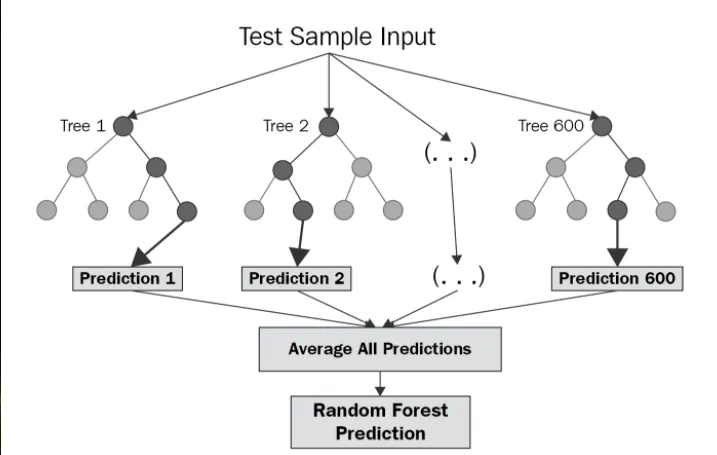

**Photo Taken from: https://levelup.gitconnected.com/random-forest-regression-209c0f354c84**

**Talking about the Hyperparameters, it has 5 Key Hyperparameters:**

1. ***n_estimators:***

- **Definition:** The number of trees in the forest. **(For example, in above photo, it is 600)**
- **Typical Examples:** 100, 200, 500, 600
- **Effect:** More trees generally improve accuracy but increase computation time.

2. ***max_depth:***

- **Definition:** The maximum depth of each decision tree.
- **Typical Examples:** Integers (e.g., None, 10, 20, 30).
- **Effect:** Limiting the depth can prevent overfitting. Deeper trees can capture more complex patterns but may overfit the training data.

3. ***min_samples_split:***

- **Definition:** This is the minimum number of data points required to split a node in the tree.
- **Typical Examples:** 2, 5, 10
- **Effect:** If this number is higher, it prevents the model from making too many splits, which can help avoid overfitting.

4. ***min_samples_leaf:***

- **Definition:** This is the minimum number of data points that must be at a leaf node (the end of the tree).
- **Example Examples:** 1, 2 or 4
- **Effect:** Increasing this number helps make the model smoother and reduces overfitting by ensuring that leaves contain enough data.

5. ***max_features:***

- **Definition:** This determines how many features (inputs) to consider when splitting a node.
- **Typical Examples:** "auto" (All Features), "sqrt" (Square Root of the Number of Features), "log2" (Log Base 2 Scale of Number of Features)
- **Effect:** Using fewer features can help create more diverse trees, which usually improves the model's overall performance.

#### R-4. Extreme Gradiant Boosting Regression (XGBoost): Predicting Based on the concept of Boosting

- **XGBoost (Extreme Gradient Boosting)** is a powerful method used for making predictions based on data.
- It’s particularly good for structured data (like tables) and is widely used in competitions and real-world applications because of its accuracy and speed.
- By building many trees in a smart way, it learns from its mistakes and improves accuracy, making it a popular choice for many data scientists and machine learning practitioners!
- **Think of boosting as a team of learners working together for the same dataframe!**

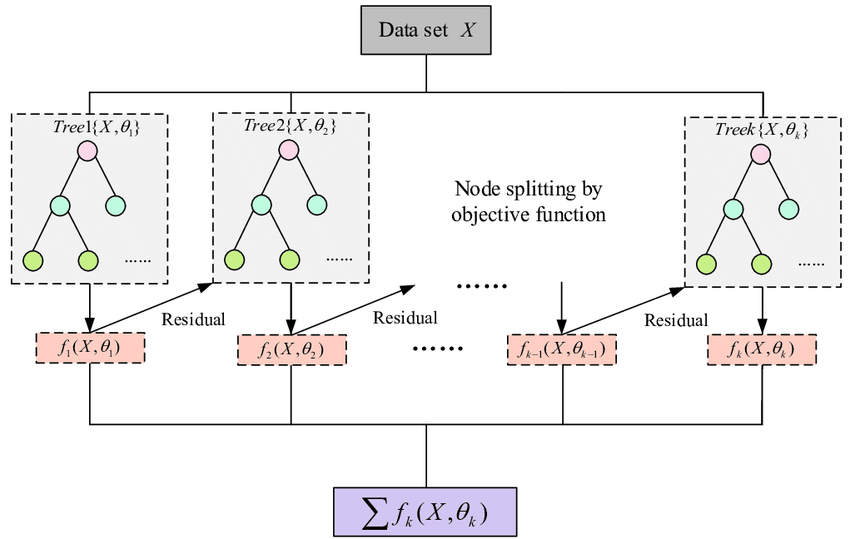

**Photo Taken from: https://www.researchgate.net/figure/Flow-chart-of-XGBoost_fig3_345327934**

**Talking about the Hyperparameters, it has 7 Key Hyperparameters:**

1. ***n_estimators:***

- **Definition:** This is the number of trees (small models) that XGBoost will create. **(For example, in above photo, it is $k$)**
- **Typical Examples:** 100, 200, 500, 600
- **Effect:** More trees can improve accuracy but also take longer to train. 

2. ***learning_rate (or eta):***

- **Definition:** This controls how much each tree contributes to the final prediction.
- **Typical Examples:** 0.01, 0.1, 0.2
- **Effect:** A smaller learning rate means each tree makes smaller adjustments, which can lead to better overall performance but requires more trees!

3. ***max_depth:***

- **Definition:**  This sets the maximum depth of each tree, or how deep it can grow.
- **Typical Examples:** 3, 5, 10
- **Effect:** Deeper trees can capture more complex patterns but might overfit the data.

4. ***min_child_weight:***

- **Definition:** This controls the minimum sum of weights (importance) of all observations required in a child node.
- **Example Examples:** 1, 5 or 10
- **Effect:** A higher value prevents the model from learning too much from very small data segments, helping reduce overfitting.

5. ***subsample:***

- **Definition:** This is the fraction of samples (data points) to use when building each tree.
- **Typical Examples:** Values between 0.5 and 1.0.
- **Effect:** Using a smaller fraction can help prevent overfitting, as it adds randomness to the model, making it more robust.

6. ***colsample_bytree:***

- **Definition:** This controls the fraction of features (inputs) to use when building each tree
- **Typical Examples:** Values like 0.5 or 0.8
- **Effect:** Using fewer features can help reduce overfitting and create more diverse trees.

7. ***gamma:***

- **Definition:** This is the minimum loss reduction required to make a split in a tree.
- **Typical Examples:** 0, 1, 5
- **Effect:** A higher value makes the algorithm more conservative by requiring more significant improvements before it decides to split a node.

### Model Fitting and Cross-Validation
- In this section, we will fit multiple machine learning models to the training data and evaluate their performance using cross-validation techniques.
- This process helps us identify the best-performing models and ensure they generalize well to unseen data.


In [451]:
# Defining Models Dictionary
models = {
    "knn": KNeighborsRegressor(),
    "ridge": Ridge(),
    "rfr": RandomForestRegressor(),
    "xgb": XGBRegressor()
}

# Storing the Cross-Validation Results 
cv_results = {}

for name, model in models.items():
    cv_score = cross_val_score(model, X_train, Y_train, cv = 5, scoring = "neg_mean_squared_error")
    cv_results[name] = np.sqrt(-cv_score)  # RMSE
    print(f"{name} CV RMSE: {np.mean(cv_results[name])}")

knn CV RMSE: 0.16909461905976456
ridge CV RMSE: 0.11432335200213387
rfr CV RMSE: 0.13631888348853022
xgb CV RMSE: 0.13805337731980077


### FINAL MODEL
- **Ridge Regression shows the lowest RMSE, indicating strong performance.**
- **Based on cross-validation results, I will select Ridge Regression as my final algorithm for the first draft.**
- ***This choice reflects the model's ability to minimize error and enhance predictive accuracy.***

### Let's dive deeper into Ridge Regression.

#### Overview
- Ridge Regression is a linear regression technique designed to combat overfitting by adding an L2 penalty to the loss function, improving generalization on unseen data.

#### Cost Function
The core of Ridge Regression lies in its modified cost function, which combines the traditional ordinary least squares **(OLS)** loss with a `L2` regularization term:

<!-- Generated by Chat GPT for the equation of Ridge Regression -->
$$
\text{Cost} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 
$$

**Where:**

- $y_i$ : Actual target values.
- $\hat{y}_i$ : Predicted values.
- $\beta_j$ : Coefficients of the features.
- $\lambda$ : Regularization parameter controlling penalty strength. **(Alpha)**
- $n$ : Number of observations.
- $p$ : Number of features.




#### Regularization
- The L2 penalty &nbsp; ($\lambda \sum_{j=1}^p \beta_j^2$) &nbsp; discourages large coefficients by adding their squares to the cost.
- The value of $\lambda$ is critical for model:

    + $\lambda = 0$ gives the simple OLS regression, while a large $\lambda$ may lead to underfitting.
    + Optimal $\lambda$ can be determined using techniques like Grid Search combined with cross-validation. **(Will be used in later sections)**

#### Standardization of Features
- Before applying Ridge Regression, it is essential to standardize or normalize the features.
- This ensures that all predictors contribute equally to the penalty term, preventing variables with larger scales from disproportionately influencing the model.

#### Hyperparameter Optimization
- Testing different $\lambda$ values helps find the one that minimizes validation error, balancing bias and variance.

#### Bias-Variance Trade-off
- In regression modeling, there is a delicate balance between bias and variance. Ridge Regression introduces a small amount of bias by penalizing large coefficients, which helps to decrease variance.
- This means that while the model may not fit the training data perfectly, it is more likely to perform well on new, unseen data, ultimately leading to better generalization.

#### Comparison with Lasso Regression

While both Ridge and Lasso regression are regularization techniques, they differ significantly in their approach:

- **Ridge Regression (L2 Regularization):**

    + Retains all features in the model by shrinking coefficients towards zero but never exactly to zero.
    + Ideal for situations where many predictors contribute to the outcome. <br> <br>

- **Lasso Regression (L1 Regularization):**

    + Can shrink some coefficients to zero, effectively performing feature selection.
    + Useful when you suspect that only a few predictors are significant.

#### Final Selection
- Ridge Regression is a robust choice due to its ability to balance bias and variance effectively.
- Its performance on this dataset, indicated by a low Root Mean Squared Error (RMSE), makes it a strong candidate for reliable predictions.

### Fitting the Ridge Regression Model on the Training Dataframe

In [452]:
# Making a New Ridge Regression Model
ridge = Ridge()

# Fitting that Model on our Training Data
ridge.fit(X_train, Y_train)

Ridge()

## Step-6: Evaluation of Validation Set

**Having fitted the Ridge Regression model on the training dataset, it's time to evaluate its performance on the previously split validation set.** <br>
**Note: I will use Root Mean Squared Error `(RMSE)` and Mean Absolute Error `(MAE)` to assess the model's accuracy.**

#### RMSE and MAE Calculation

In [453]:
Y_valid_pred = np.exp(ridge.predict(X_valid))

valid_rmse = root_mean_squared_error(np.exp(Y_valid), Y_valid_pred)
valid_mae = mean_absolute_error(np.exp(Y_valid), Y_valid_pred)

print(f"Validation RMSE: {valid_rmse:.2f}, Validation MAE: {valid_mae:.2f}")

Validation RMSE: 16087.79, Validation MAE: 11327.82


#### Experiment Results of Log Transformation
- I evaluated the performance of the model on both datasets: **one with a log transformation of the target variable and the other without.**
- The results indicate that the log transformation yielded better performance metrics, demonstrating improved accuracy and reduced error rates.<br> **A summary of the evaluation results is presented in the table below.**

|     **Target**    | **Validation RMSE** | **Validation MAE** |
|:-----------------:|:-------------------:|:------------------:|
|   **_With Log_**  |       16087.79      |      11327.82      |
| **_Without Log_** |       19784.15      |      13933.33      |

## Step-7: Hyperparameter Optimization/Tuning

**Now comes the exciting part: improving our fitted Ridge Regression model through hyperparameter tuning.** <br>
**NOTE: In this step, I will focus on optimizing the alpha hyperparameter, which controls the strength of regularization. To achieve this, I will utilize GridSearchCV, a method that systematically searches for the best parameter values by evaluating model performance across a range of alpha values.**

### GridSearchCV on Ridge Regression

In [454]:
# Making again a new Ridge instance
ridge = Ridge()

# Parameters List (Alpha)
params_list = {"alpha":[1e-3, 1e-2, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]}

# GridSearchCV
gridcv = GridSearchCV(ridge, params_list, scoring = "neg_root_mean_squared_log_error", cv = 5, verbose = True, n_jobs = -1)

In [455]:
# Fitting GridCV on training Dataframe (Original)
gridcv.fit(train_X, train_Y)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 15, 20, 25, 30, 35,
                                   40, 45, 50, 55, 60, 65, 100]},
             scoring='neg_root_mean_squared_log_error', verbose=True)

#### Best Alpha we can get

In [456]:
# Best Alpha
best_alpha = gridcv.best_params_
print(f"Optimal Alpha on whole Training Dataset: {best_alpha}")

Optimal Alpha on whole Training Dataset: {'alpha': 20}


#### Best Estimator we can get out of the Ridge Regression

In [457]:
# best Ridge
best_ridge = gridcv.best_estimator_

# Fitting again on the Training Dataframe
best_ridge.fit(train_X, train_Y)

Ridge(alpha=20)

## Step-8: Predictions on Test Dataset

**It's time to predict SalePrice on the hold-out test dataset and submit the results on Gradescope following the GitHub instructions.**

### Actual Predictions of Test Dataset

In [458]:
# Predicting on new dataframe
log_predictions = best_ridge.predict(test_X)
actual_predictions = np.exp(log_predictions)

**NOTE: I have to apply `np.exp` to reverse the Logarithmic Transformation that we did earlier in other section!**

### Printing the List of Rounded Predictions 

In [459]:
# New Predictions and Print the Predictions
list_predictions = actual_predictions.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)

[196091, 116495, 106998, 148943, 116167, 244075, 83360, 175202, 151336, 155553, 137354, 278829, 264005, 175730, 166963, 436723, 123967, 171601, 218519, 82226, 119049, 193327, 163315, 182678, 102036, 114817, 190088, 189792, 168516, 108679, 106839, 140159, 358917, 242352, 168717, 162804, 94382, 140668, 226349, 218219, 150233, 167043, 208736, 139754, 134979, 105468, 108779, 231235, 306850, 169307, 251760, 141225, 117910, 195036, 169432, 185559, 125025, 196269, 141671, 109398, 112410, 123953, 157014, 129386, 213169, 243562, 177442, 207169, 258650, 95597, 221591, 251496, 86634, 241278, 178854, 215173, 100174, 189631, 104077, 161087, 126628, 155394, 233844, 244386, 119920, 227732, 260723, 135999, 292111, 171537, 149738, 190259, 337921, 144422, 153053, 92078, 140993, 206325, 142592, 84478, 187424, 126659, 279169, 156966, 119967, 121739, 203926, 140346, 285663, 334395, 204537, 203934, 81688, 147153, 112917, 131331, 142830, 214966, 237416, 309751, 257839, 224290, 310164, 141612, 113545, 199578,

**WHEN I SUBMITTED THIS LIST OF PREDICTIONS ON GRADSCOPE, I GOT 18,407 RMSE**

## Step-9. Demonstration of Underfitting vs Overfitting

- In the community of the Machine Leaning, one of the biggest challenge for the Model Fitting is the perfect balance between the **Underfitting & Overfitting**!
- With context to these terms, it refers to how well the model performs on the training dataset as compared to the unforeseen testing dataset.
-  I’ll illustrate these concepts using the Ridge Regression model applied to a housing dataset, focusing specifically on the role of the regularization parameter, alpha **$α$**

### Overfitting and Underfitting Explained

#### Underfitting:
- Now, Let's start with understanding the **Underfitting**. This generally occurs when our model is too simple to capture every underlying patterns in the data.
- As a result, we see high errors on both the training and testing datasets.
- **In the context of Ridge Regression, if we set $α$ to a very high value, the model becomes overly regularized.**
- **It essentially ignores important features, which can lead to poor predictive performance.**

#### Overfitting:
- Now, on the other side we have **overfitting**. This happens when the model learns not only the true patterns in the training data but also the noise.
- This eventually results in a ***low training error*** because the model fits the training data very closely. However, it performs poorly on the test data, leading to a ***high test error***.
- **In Ridge Regression, a very low value of $α$ allows the model to fit the training data tightly, capturing noise as well as the actual signal. (Similar to Simple Linear Regression)**

### The Role of Alpha in Ridge Regression

**In Ridge Regression, the $α$ parameter controls the amount of regularization. As we adjust $α$, we see different behaviors:**
1. ***When $α$ is high***, the model is too constrained. This results in both training and test errors being high, which indicates ***underfitting.***
2. ***When $α$ is low***, the model has more freedom. The training error drops significantly, but the test error starts to rise, signaling ***overfitting.***

### Visualizing the Overfitting and Underfitting (U-Shaped Curve)

**To better understand this, we can create a validation set and evaluate how the training and test errors change as we vary $α$. Here’s how we can do that:**

Optimal Alpha by Plot: 43.29


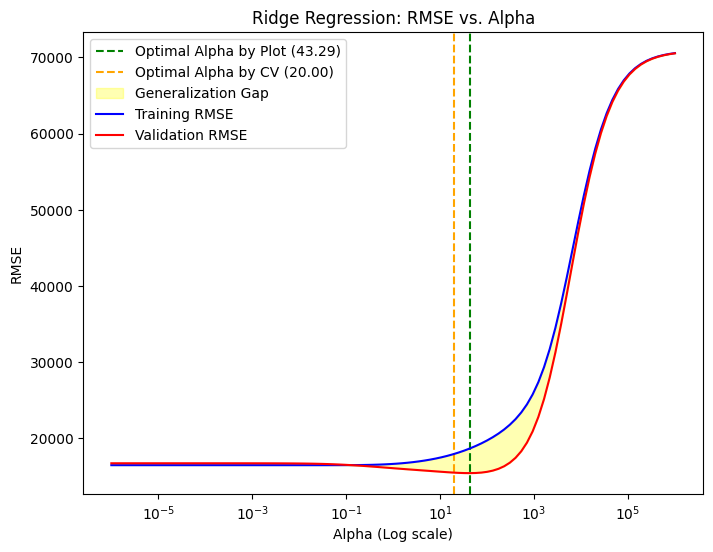

In [306]:
alphas = np.logspace(-6, 6, 100)  # Alpha values from 10^-4 to 10^4
train_rmse = []
valid_rmse = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)  # Create Ridge model with current alpha
    ridge.fit(X_train, Y_train)  # Fit on log-transformed target

    # Reverse the log transformation on the predictions
    train_preds = np.exp(ridge.predict(X_train)) # Reverse the log for training
    valid_preds = np.exp(ridge.predict(X_valid))  # Reverse the log for validation
    
    # Calculate RMSE
    train_rmse.append(root_mean_squared_error(np.exp(Y_train), train_preds))  # Use expm1 to reverse log transformation of Y_train
    valid_rmse.append(root_mean_squared_error(np.exp(Y_valid), valid_preds))  # Same for Y_valid

# Deriving best alpha from plot
min_rmse_index = np.argmin(valid_rmse)
optimal_plot_alpha = alphas[min_rmse_index]
print(f"Optimal Alpha by Plot: {optimal_plot_alpha:.2f}")

# Cross-Validation Best Alpha
optimal_cv_alpha = 20

# Plot the RMSE for training and validation against alphas
plt.figure(figsize = (8,6))
plt.axvline(optimal_plot_alpha, linestyle='--', color='green', label=f'Optimal Alpha by Plot ({optimal_plot_alpha:.2f})') 
plt.axvline(optimal_cv_alpha, linestyle='--', color='orange', label=f'Optimal Alpha by CV ({optimal_cv_alpha:.2f})') 
plt.fill_between(alphas, train_rmse, valid_rmse, color='yellow', alpha=0.3, label='Generalization Gap')
plt.plot(alphas, train_rmse, label = "Training RMSE", color = 'blue')
plt.plot(alphas, valid_rmse, label = "Validation RMSE", color = 'red')
plt.xscale("log")  # Log scale for alpha because of usage of logspace
plt.xlabel("Alpha (Log scale)")
plt.ylabel('RMSE')
plt.title('Ridge Regression: RMSE vs. Alpha')
plt.legend()
plt.show()

#### Important Note About Different Alphas:
- **The different alphas arise because `GridSearchCV` averages over multiple data splits, giving a more reliable alpha (20), while the single training-validation split `alpha` (43.29) reflects only one specific partition. This makes GridSearchCV's alpha better for generalization.**

#### Interpreting the Trend of Curve:

***1. Low Alpha: (Left Side)***
- In the Far Left side of the plot, both training and validation RMSE are high. This suggests that will very minimual regularization, it is likely overfitting the model and is acting as the simple Linear Regression.
- It's learning the training data too well, including noise and specific patterns that don't generalize to ***new data.***

***2. Increasing Alpha: (From Left to Right)***
- As alpha increases, the **training RMSE** gradually increases. This is very expected because stronger regularization forces the model to have smaller coefficients, which can slightly reduce its ability to fit the training data perfectly.
- Crucially, the **validation RMSE** initially decreases. This indicates that regularization is helping to prevent *overfitting*. By penalizing large coefficients, it's making the model less sensitive to the noise in the training data and finding patterns that <u>generalize better.</u>

***3. High Alpha: (Right Side)***
- Both training and validation RMSE increase significantly. This means we've gone too far with **regularization.**
- The model is now too constrained, and it's <u>underfitting</u> the data. It's unable to capture the underlying relationships in the data effectively.

***4. Generalization Gap:***
- The generalization gap isn't just about the <u>difference between training and validation error,</u> but also about the overall performance level.
- A large generalization gap can occur at high alpha because the model is **underfitting**, leading to poor performance on both seen and unseen data, even if the errors appear close together. 

### Conclusion of Demonstration:

- In conclusion, the balance between <u>overfitting and underfitting</u> is very crucial for developing robust predictive models. 
- In the context of ***Ridge Regression*** applied to housing data, adjusting the regularization parameter $α$ reveals significant insights into model performance.
- Through the **U-shaped curve** of training and test errors, we can visually comprehend the trade-offs involved and identify the optimal model complexity that generalizes well to unseen data.
- By understanding and applying these concepts, we can enhance the **effectiveness** of our predictive modeling efforts and increase the overall accuracy of the model.

#### ------------------------------------------------------------ THE END ------------------------------------------------------------ ####